In [70]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

set.seed(1)




options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale


## Data partition

In [71]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [72]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.3592437 0.6407563 

In [73]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    555     555 

## Model

In [74]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [75]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=54 
- Fold01.Rep1: nIter=54 
+ Fold02.Rep1: nIter=54 
- Fold02.Rep1: nIter=54 
+ Fold03.Rep1: nIter=54 
- Fold03.Rep1: nIter=54 
+ Fold04.Rep1: nIter=54 
- Fold04.Rep1: nIter=54 
+ Fold05.Rep1: nIter=54 
- Fold05.Rep1: nIter=54 
+ Fold06.Rep1: nIter=54 
- Fold06.Rep1: nIter=54 
+ Fold07.Rep1: nIter=54 
- Fold07.Rep1: nIter=54 
+ Fold08.Rep1: nIter=54 
- Fold08.Rep1: nIter=54 
+ Fold09.Rep1: nIter=54 
- Fold09.Rep1: nIter=54 
+ Fold10.Rep1: nIter=54 
- Fold10.Rep1: nIter=54 
Aggregating results
Selecting tuning parameters
Fitting nIter = 10 on full training set


In [76]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=1.037e-03, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost=1.037e-03, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost=3.489e+02, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost=3.489e+02, loss=L2_primal, epsilon=1 
+ Fold01.Rep1: cost=2.200e-03, loss=L1, epsilon=1 
- Fold01.Rep1: cost=2.200e-03, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=1.037e-03, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost=1.037e-03, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=3.489e+02, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost=3.489e+02, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost=2.200e-03, loss=L1, epsilon=1 
- Fold02.Rep1: cost=2.200e-03, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=1.037e-03, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost=1.037e-03, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=3.489e+02, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost=3.489e+02, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost=2.200e-03, loss=L1, epsilon=1 
- Fold03.Rep1: cost=2.200e-03, loss=L1, epsilon=1 
+ Fold04.R

## Results

Boosted Logistic Regression 

1110 samples
  73 predictor
   2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  10     0.7862856  0.5694730
  27     0.7097666  0.4195674
  54     0.7513844  0.4990479

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 10.


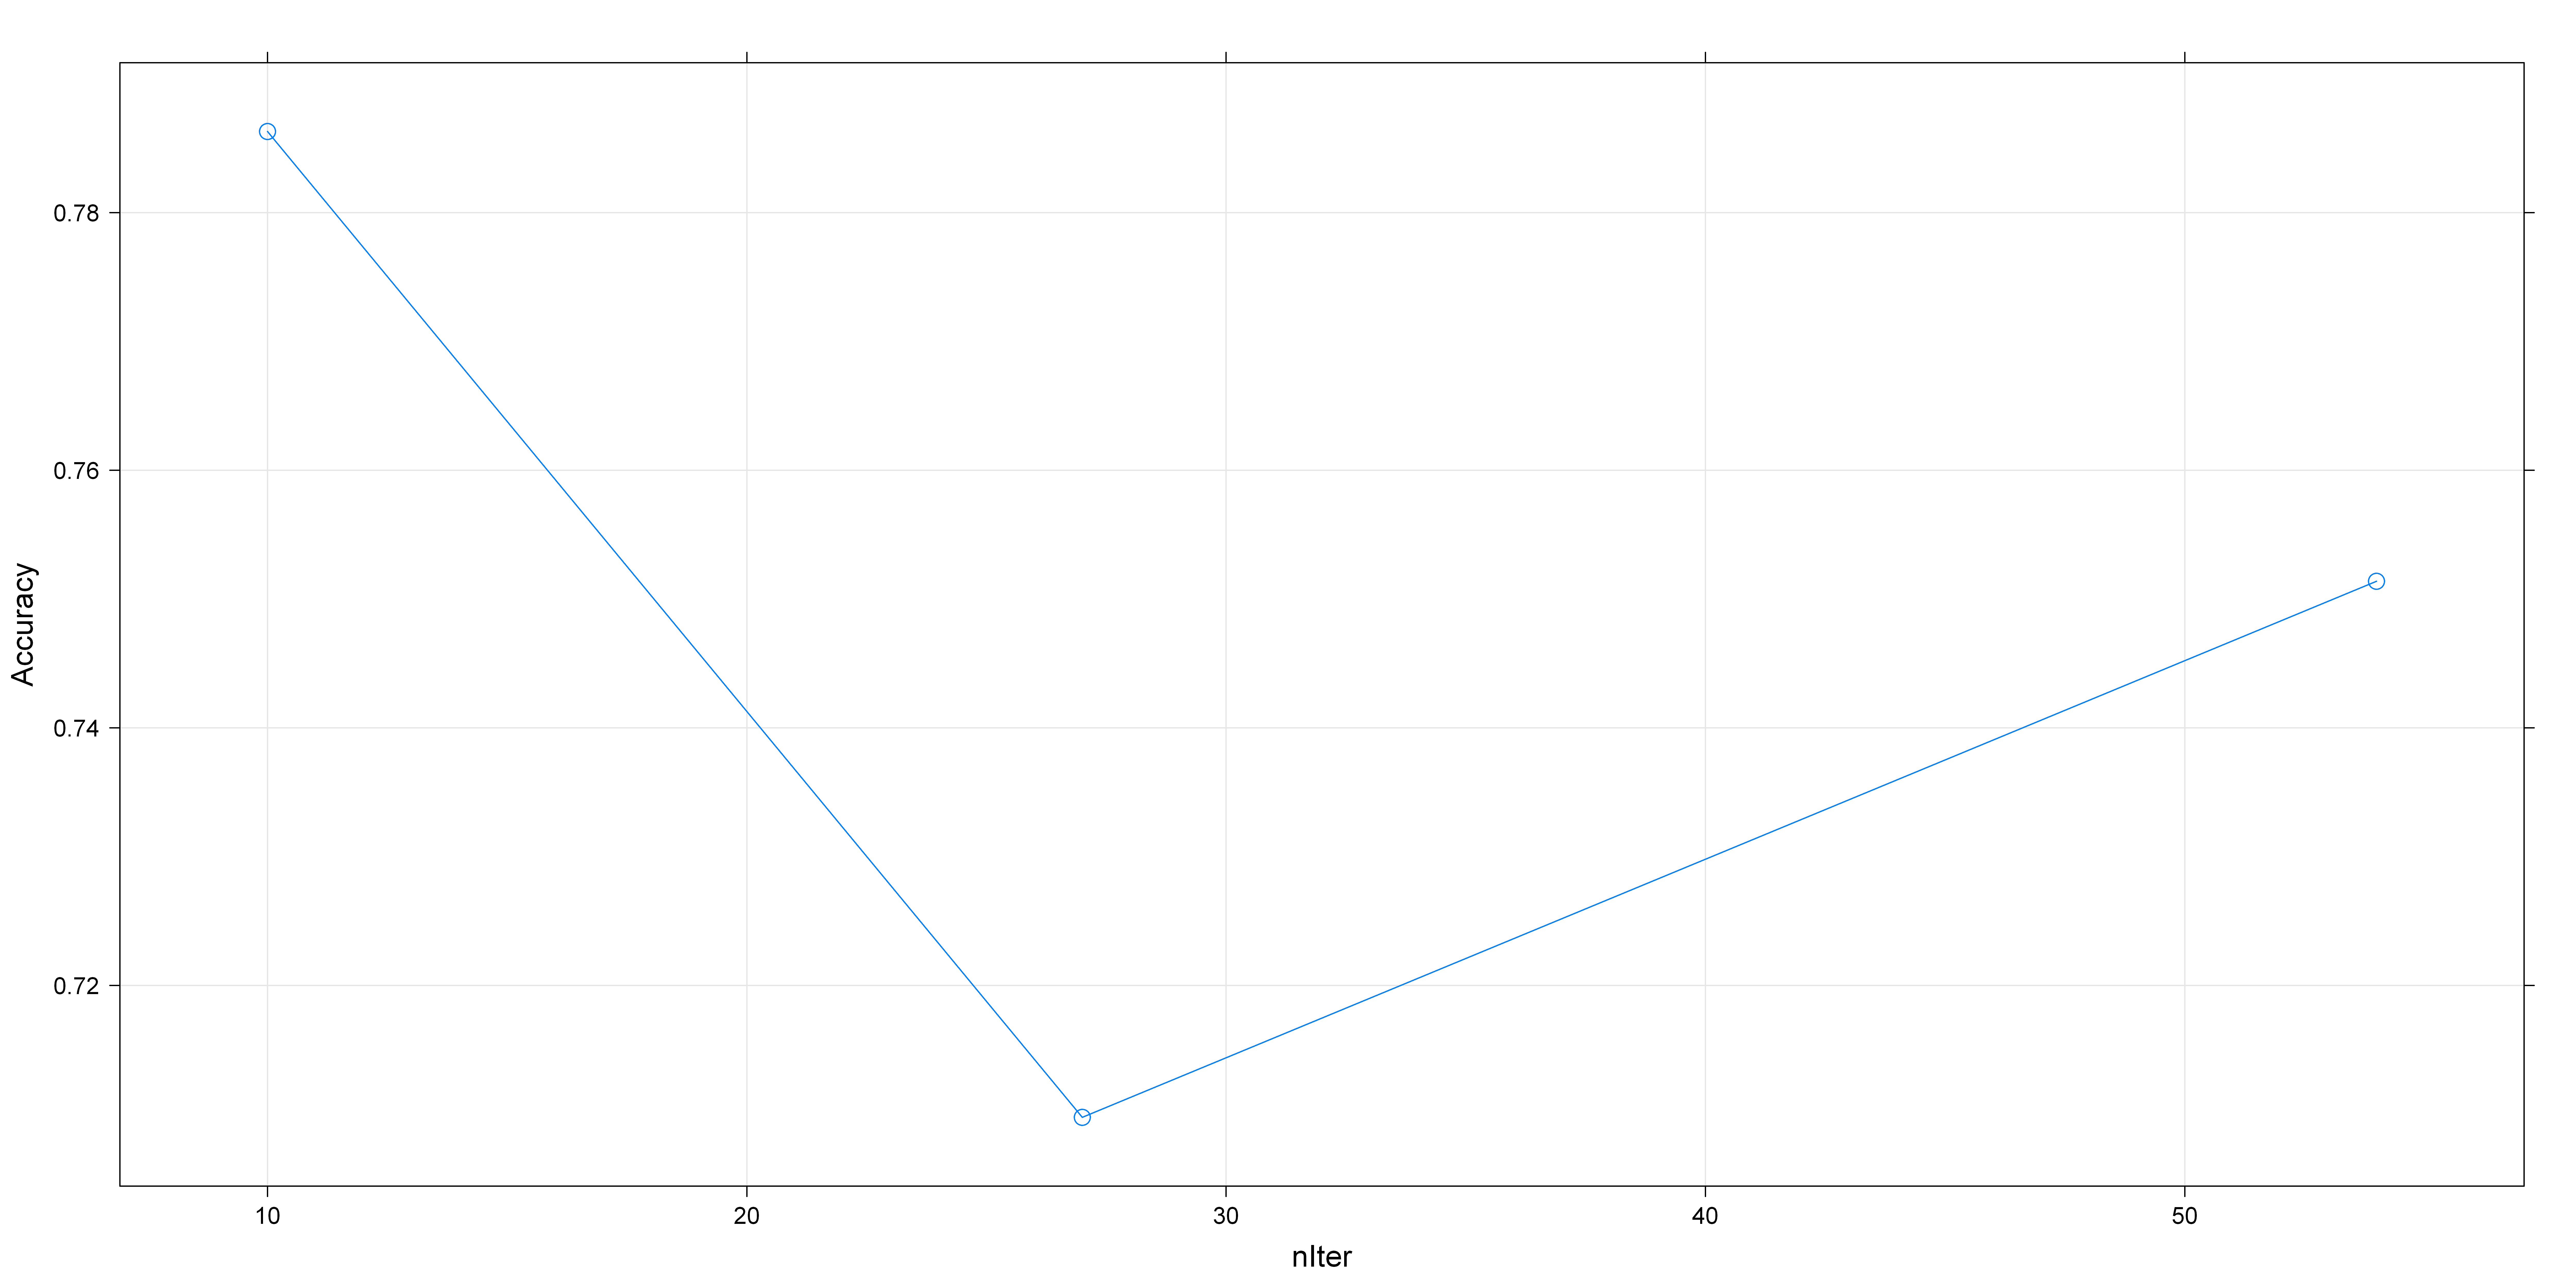

In [77]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

1110 samples
  73 predictor
   2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 999, 1000, 999, 999, 1000, 999, ... 
Resampling results across tuning parameters:

  cost          loss       Accuracy   Kappa    
  1.037488e-03  L2_dual    0.7280329  0.4562781
  2.199926e-03  L1         0.5000000  0.0000000
  3.488949e+02  L2_primal  0.7432264  0.4864272

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 348.8949, loss = L2_primal
 and epsilon = 1.


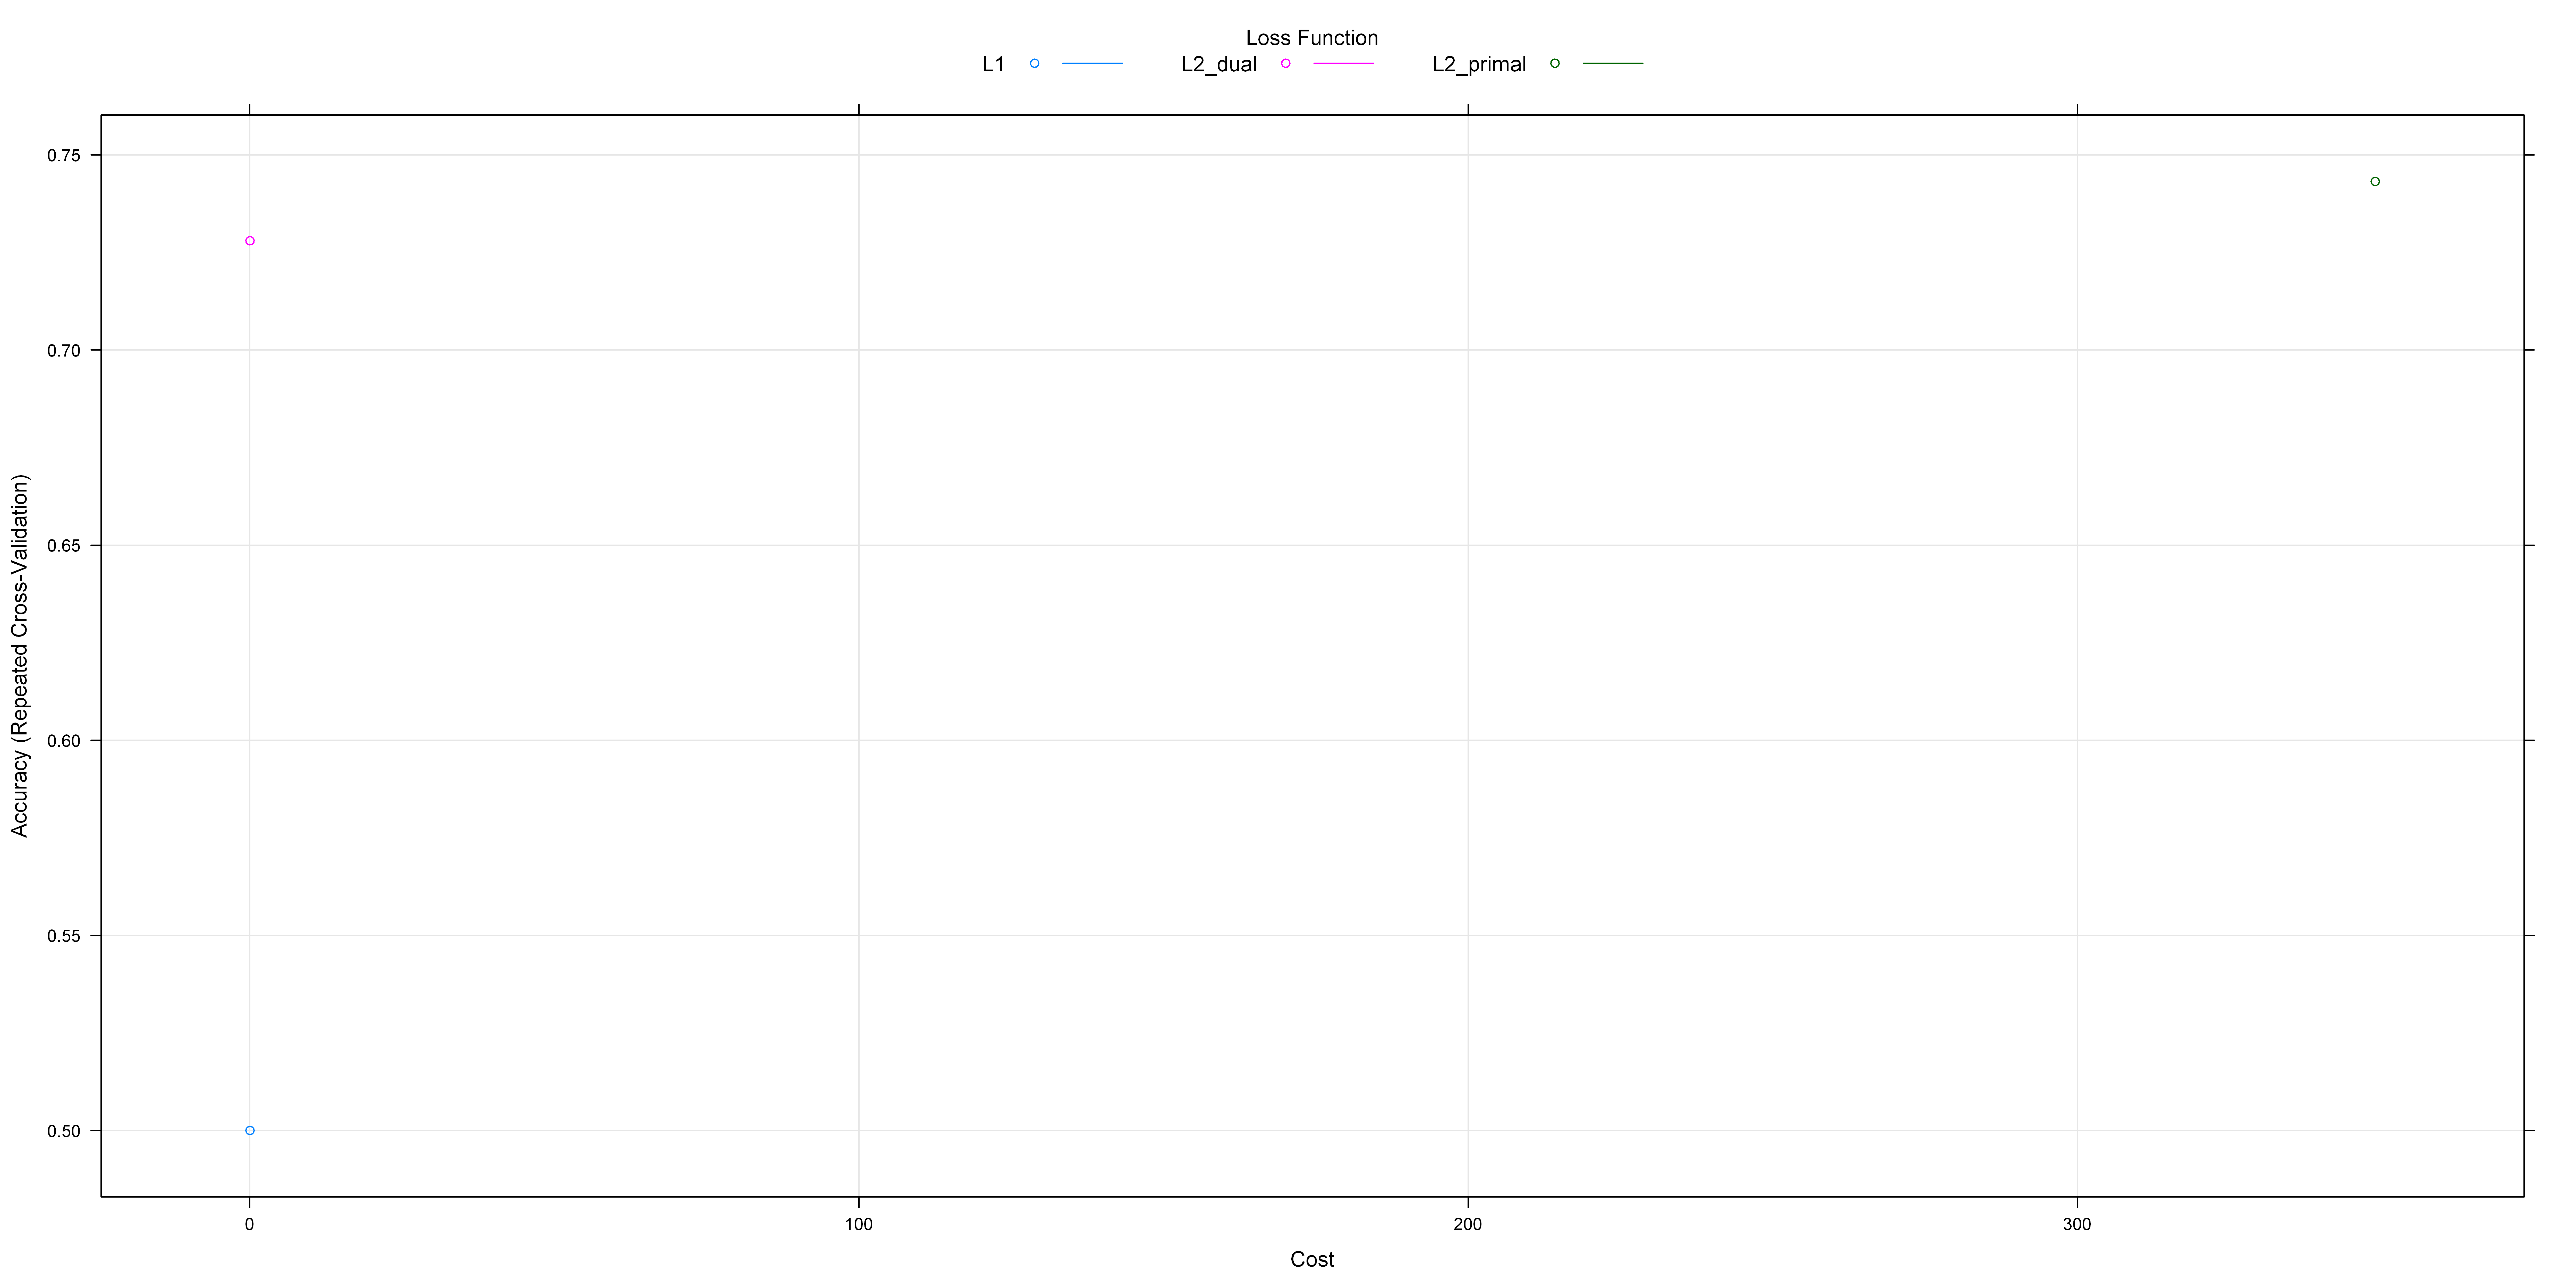

In [78]:
print(model_regLogistic)
plot(model_regLogistic)

In [79]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 73)

                         Importance
realMELDNa                   100.00
centreCode                    76.74
IntraoperativTransfected      73.98
surgeryDuration               64.59
albumina                      59.00
platCountTranspl              51.76
presentRefractAscites         50.44
ratioPaO2FiO2                 49.65
plasmaPools                   48.60
intermedLactates              48.27
noradrenalineEndSurger        45.67
albumInfusOver7Days           36.88
new_admWard                   34.25
CRIOprecipitated              33.70
EPScum                        29.79
degenzaPreTra                 28.40
syndromeReperfus              27.21
tumore                        23.47
organDonorGammaGT             17.09
organDonorDrawalSodiemia      16.40


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6750000 0.7508117 0.7828947 0.7862856 0.8421053 0.8591549    0
regLogistic 0.6785714 0.7188165 0.7285422 0.7432264 0.7815315 0.8108108    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3500000 0.5024748 0.5622313 0.5694730 0.6803794 0.7155449    0
regLogistic 0.3571429 0.4374629 0.4570163 0.4864272 0.5632797 0.6214065    0


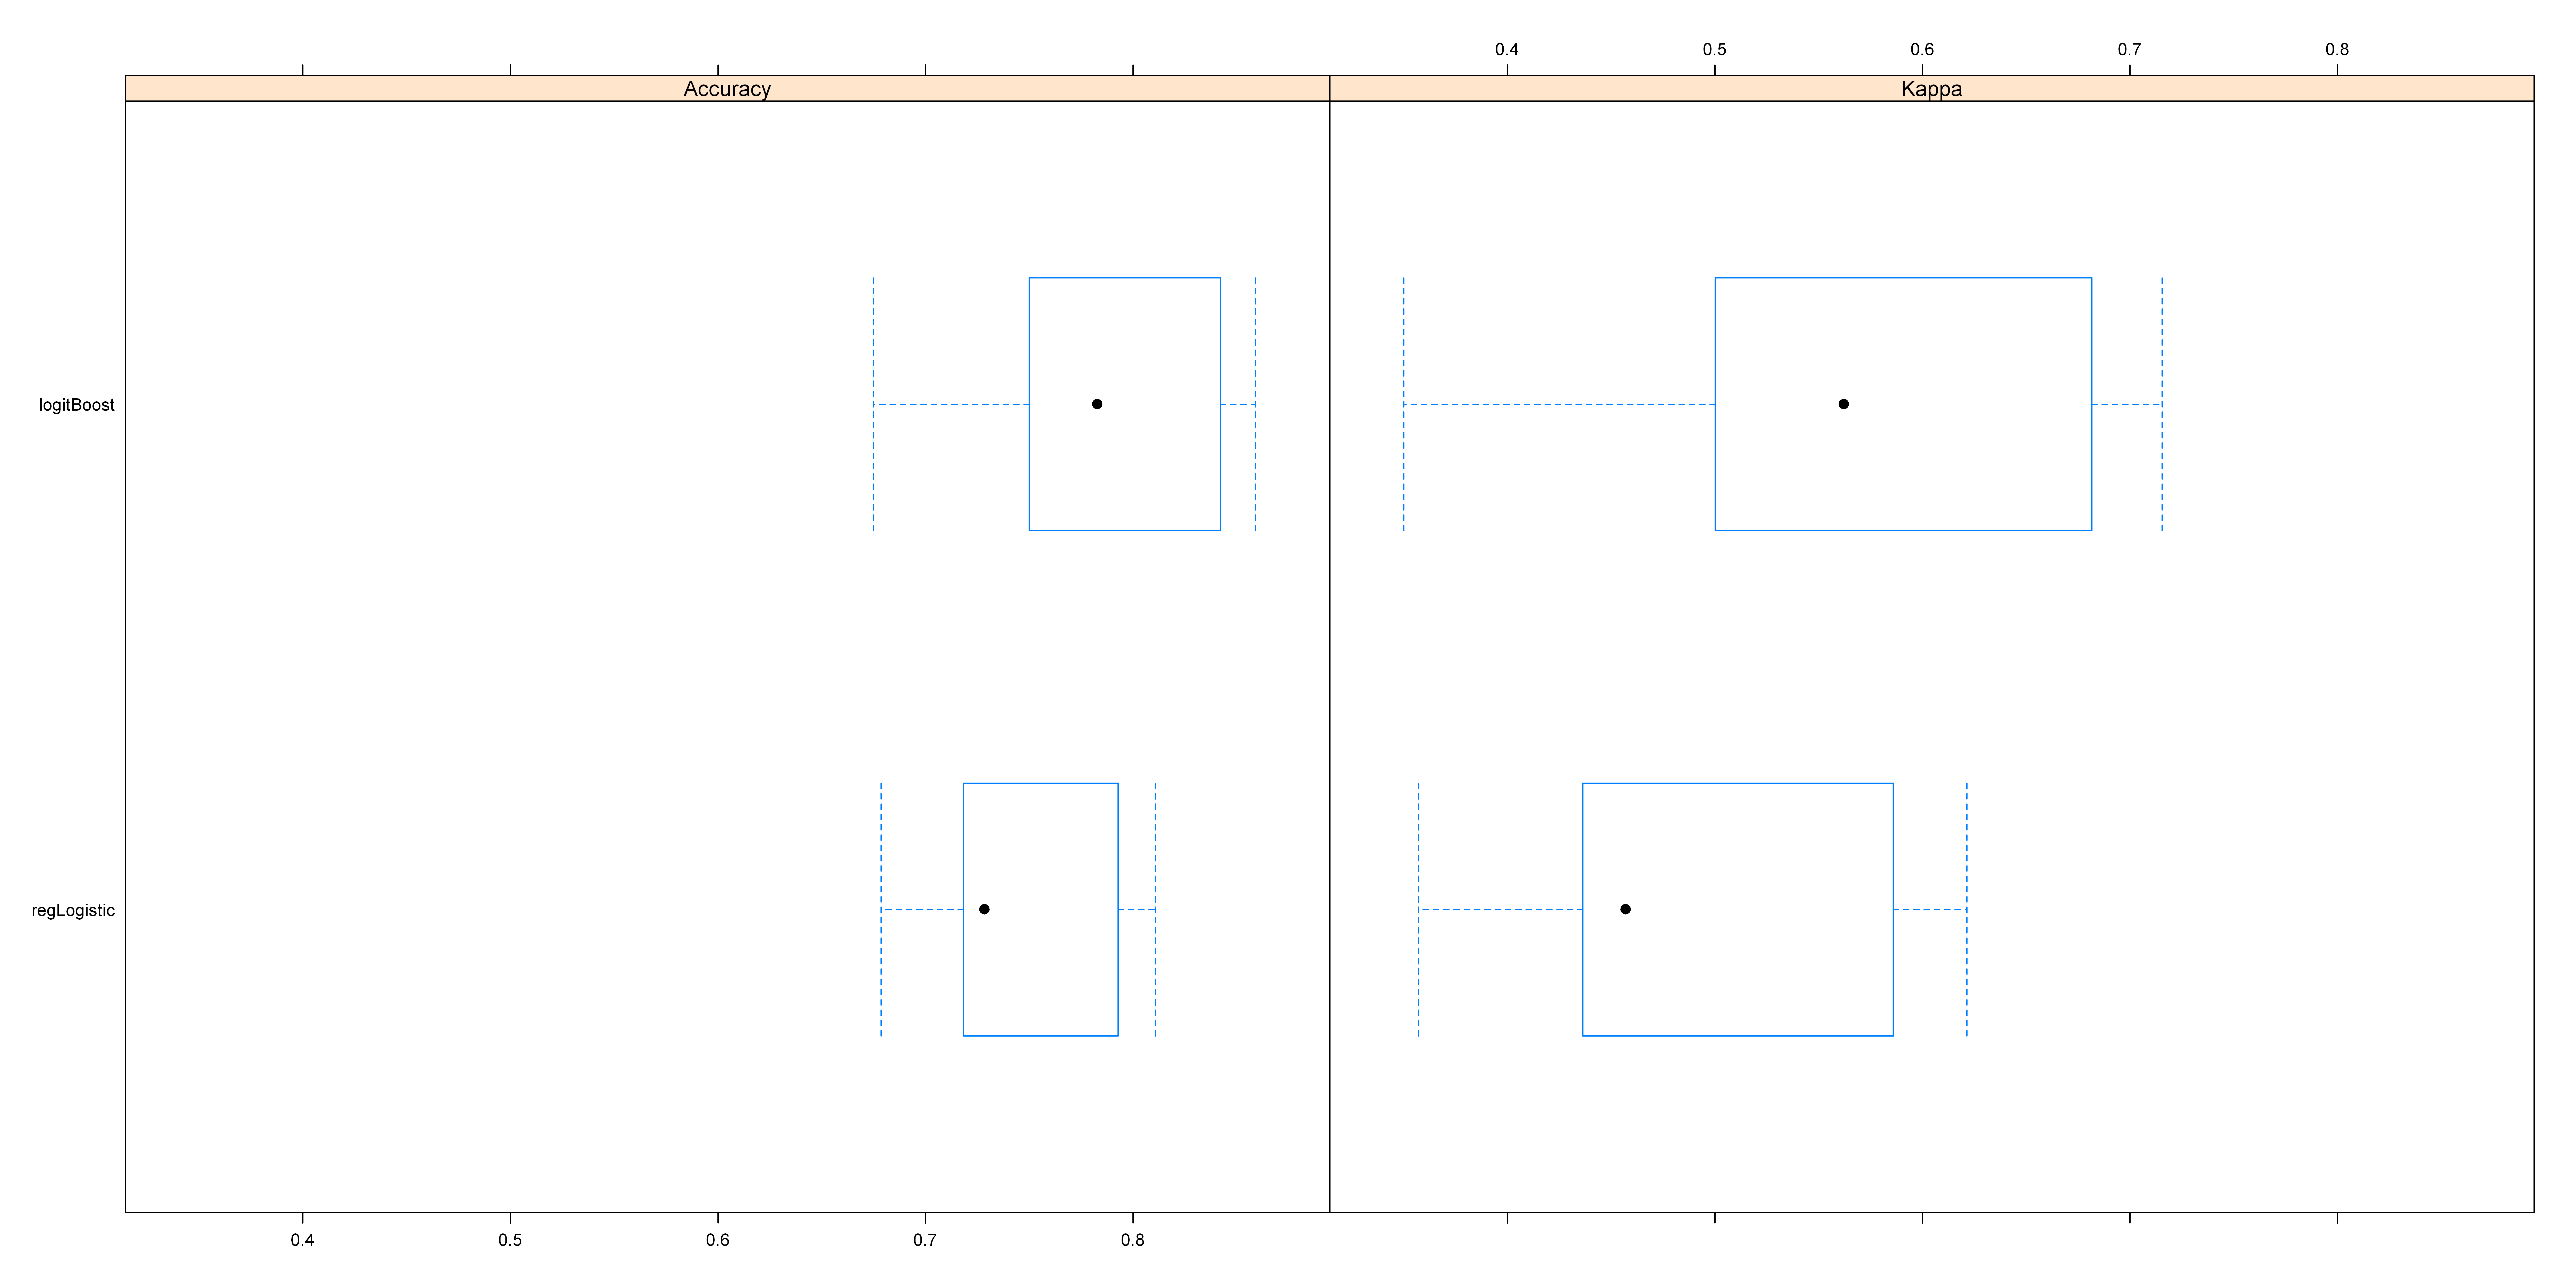

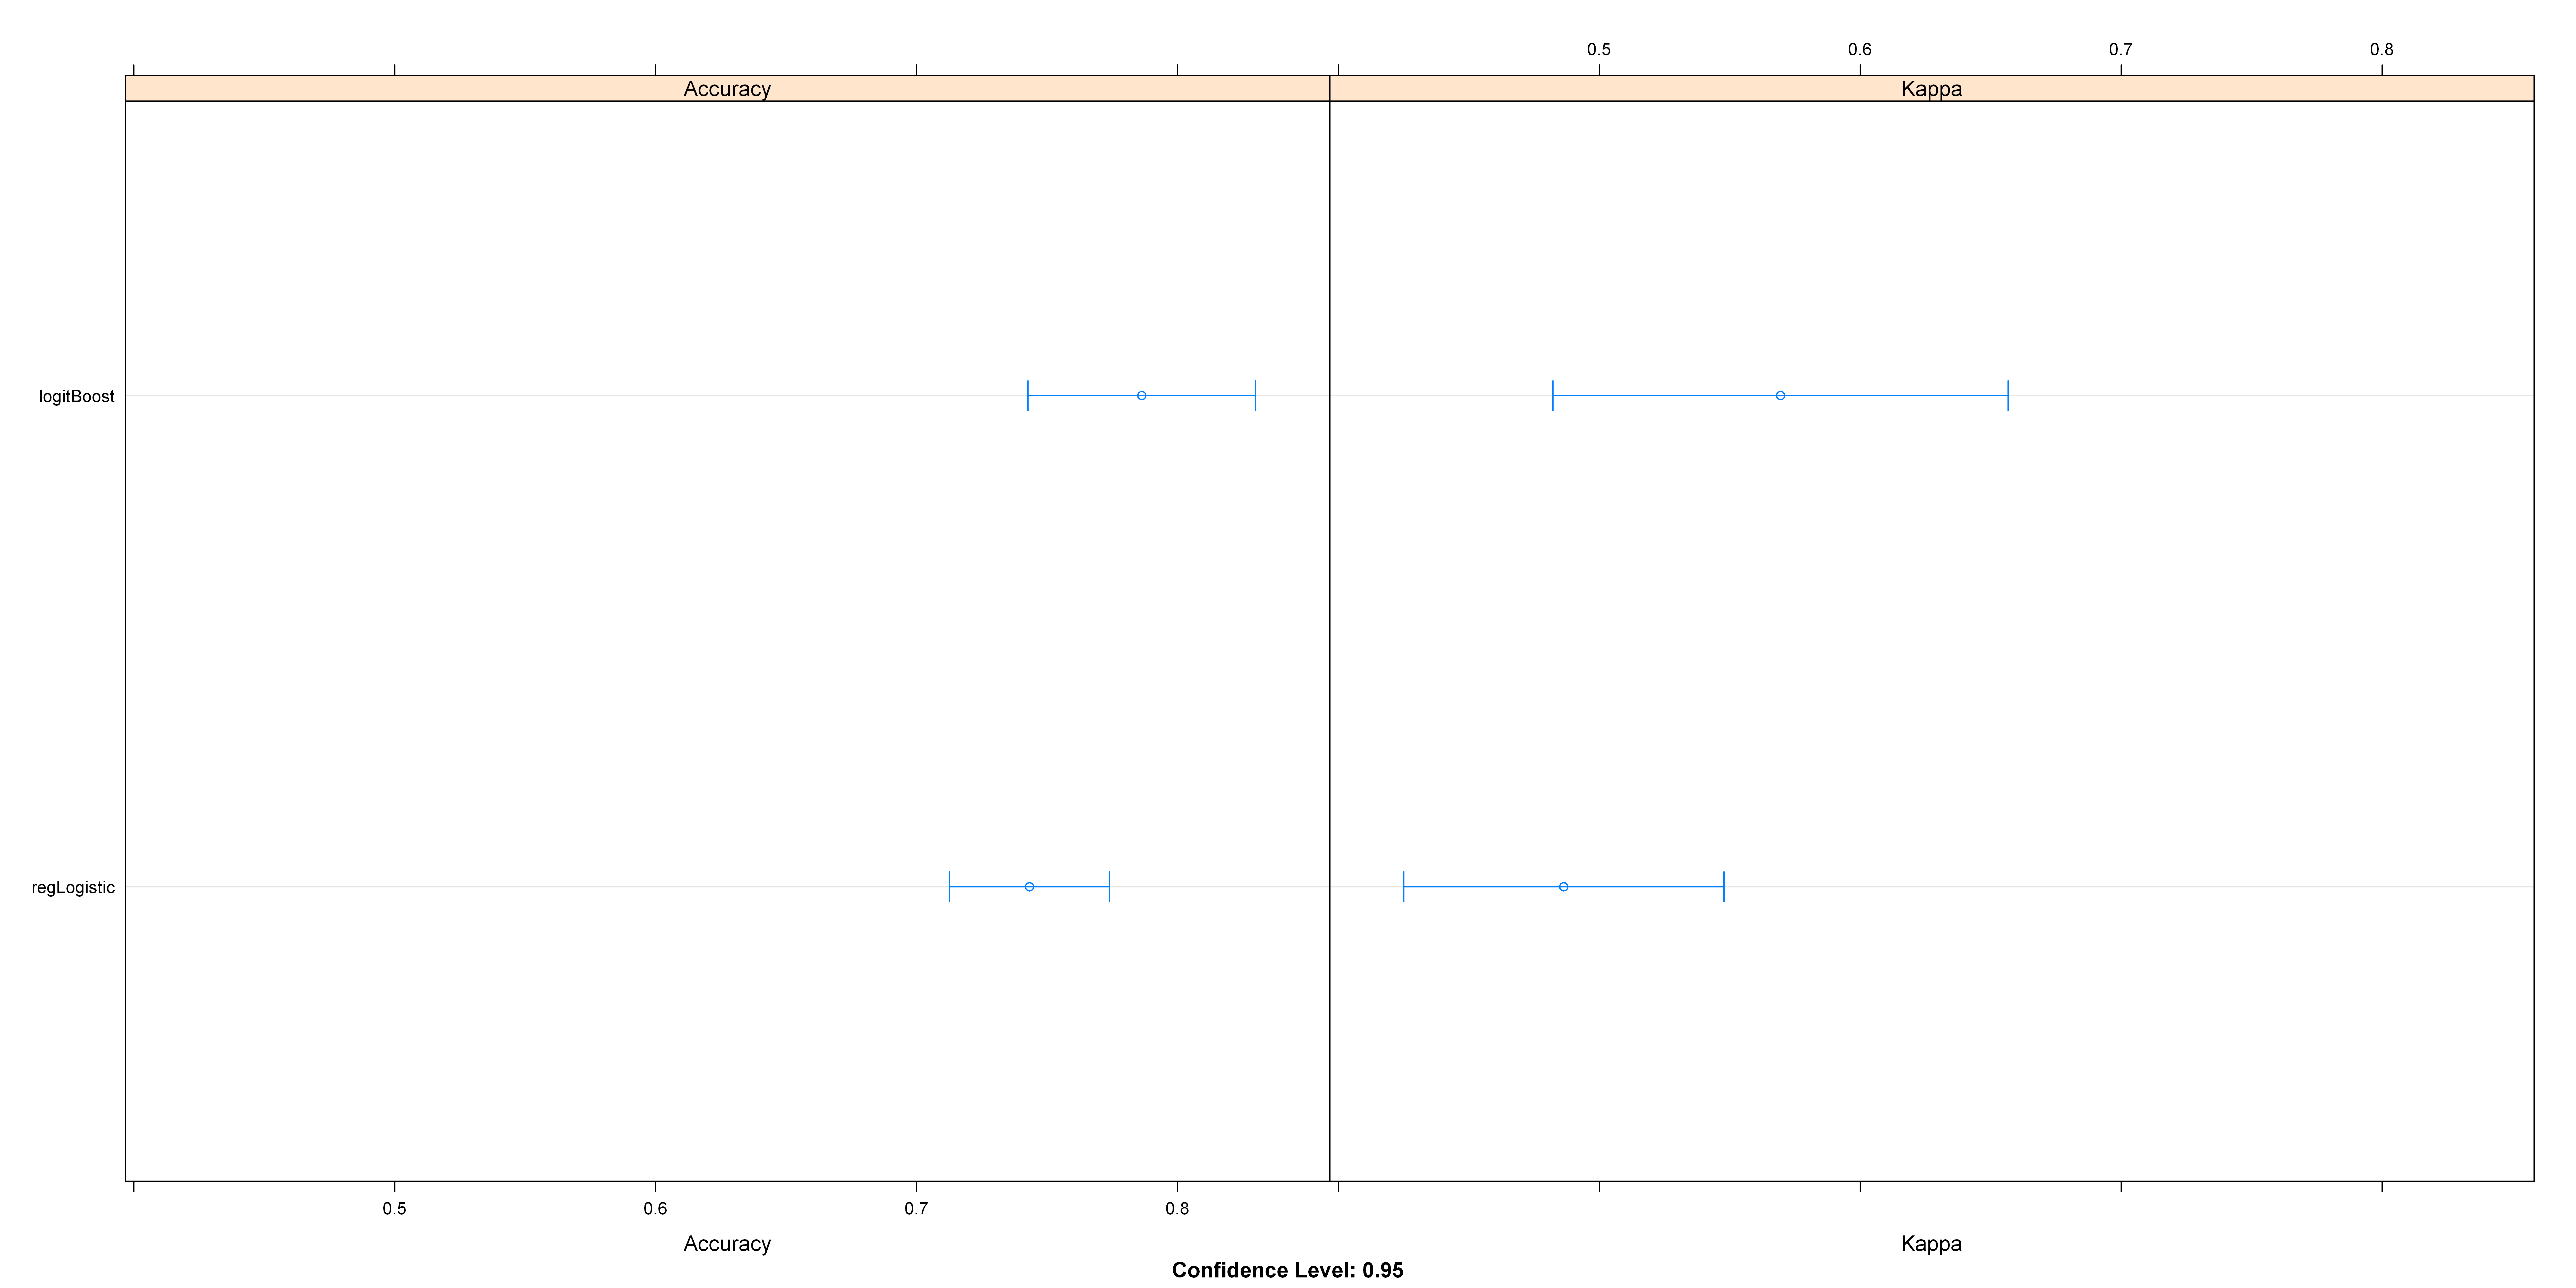

In [80]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [81]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      96      23
   NotFast   58     145
                                          
               Accuracy : 0.7484          
                 95% CI : (0.6973, 0.7949)
    No Information Rate : 0.5217          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4911          
                                          
 Mcnemar's Test P-Value : 0.0001582       
                                          
            Sensitivity : 0.6234          
            Specificity : 0.8631          
         Pos Pred Value : 0.8067          
         Neg Pred Value : 0.7143          
             Prevalence : 0.4783          
         Detection Rate : 0.2981          
   Detection Prevalence : 0.3696          
      Balanced Accuracy : 0.7432          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6233766            0.8630952            0.8067227 
      Neg Pred Value            Precision               Recall 
           0.7142857            0.8067227            0.6233766 
                  F1           Prevalence       Detection Rate 
           0.7032967            0.4782609            0.2981366 
Detection Prevalence    Balanced Accuracy 
           0.3695652            0.7432359

In [82]:
pred_regLogistic <- predict(model_regLogistic,test)  
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast     122      49
   NotFast   78     227
                                         
               Accuracy : 0.7332         
                 95% CI : (0.691, 0.7724)
    No Information Rate : 0.5798         
    P-Value [Acc > NIR] : 2.467e-12      
                                         
                  Kappa : 0.4413         
                                         
 Mcnemar's Test P-Value : 0.01297        
                                         
            Sensitivity : 0.6100         
            Specificity : 0.8225         
         Pos Pred Value : 0.7135         
         Neg Pred Value : 0.7443         
             Prevalence : 0.4202         
         Detection Rate : 0.2563         
   Detection Prevalence : 0.3592         
      Balanced Accuracy : 0.7162         
                                         
       'Positive' Class : fast           
                                   

Sensitivity          Specificity       Pos Pred Value 
           0.6100000            0.8224638            0.7134503 
      Neg Pred Value            Precision               Recall 
           0.7442623            0.7134503            0.6100000 
                  F1           Prevalence       Detection Rate 
           0.6576819            0.4201681            0.2563025 
Detection Prevalence    Balanced Accuracy 
           0.3592437            0.7162319

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



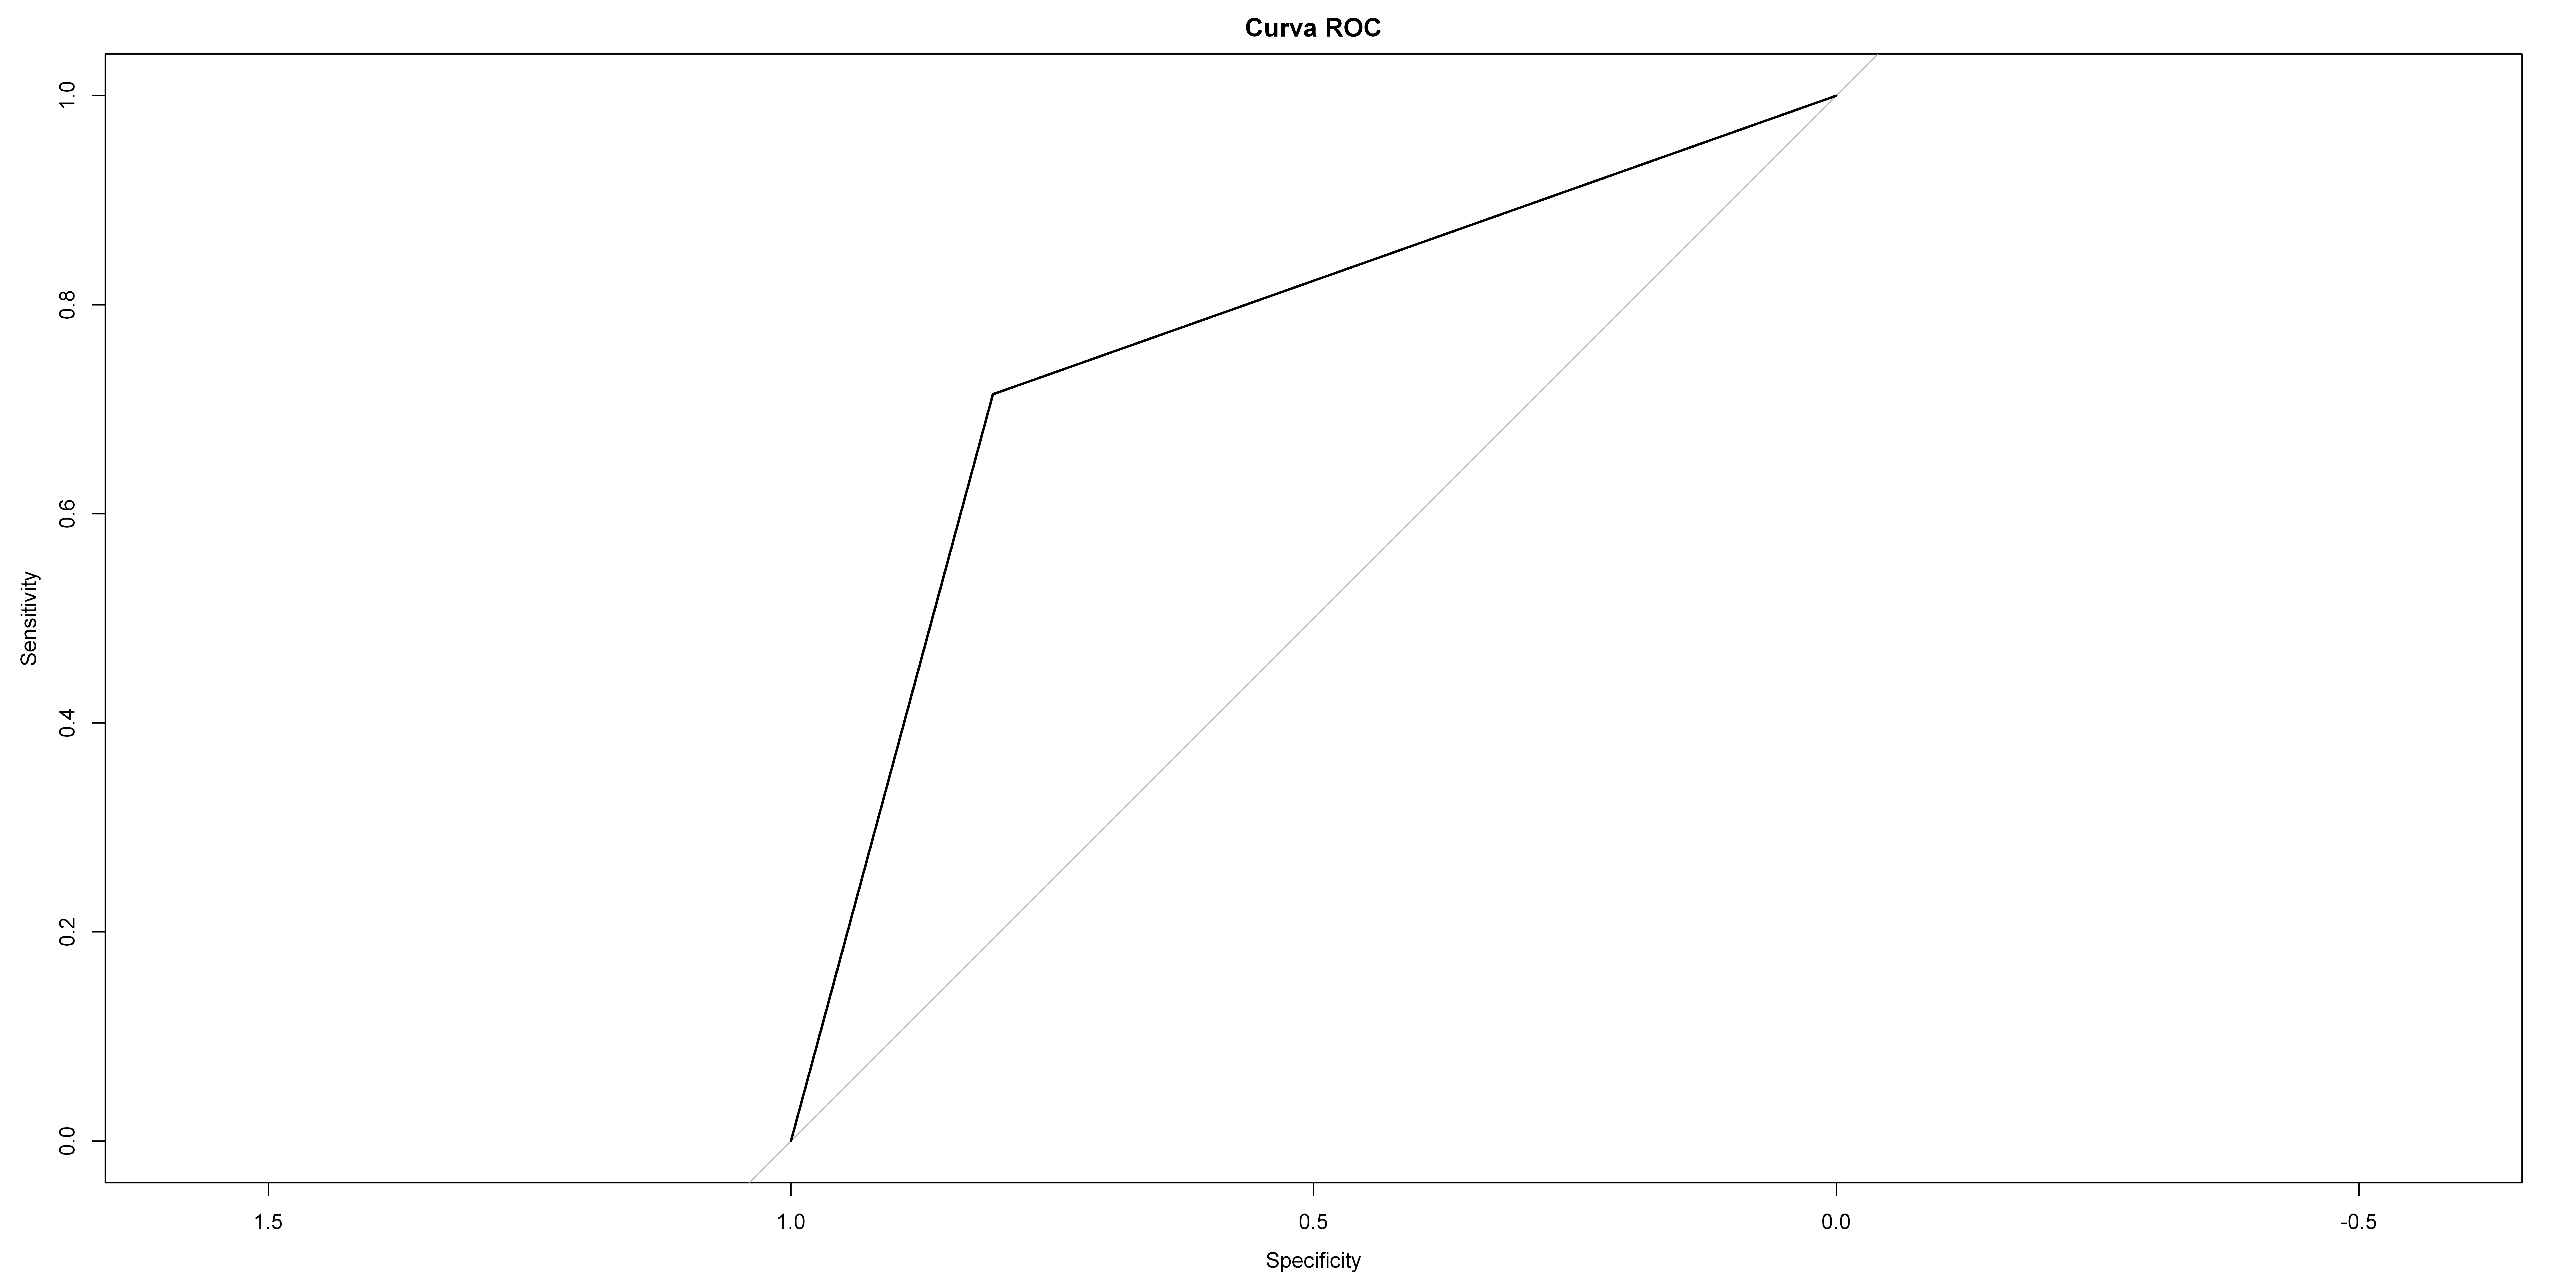

In [83]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [84]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 119 controls (TestClasses fast) < 203 cases (TestClasses NotFast).
Area under the curve: 0.7605

In [85]:
pred_logitBoost.prob

fast,NotFast
0.88079708,0.11920292
0.50000000,0.50000000
0.98201379,0.01798621
0.50000000,0.50000000
0.11920292,0.88079708
0.88079708,0.11920292
0.88079708,0.11920292
0.88079708,0.11920292
0.01798621,0.98201379
0.11920292,0.88079708


# Regressione logistica con variabili boruta

In [88]:
df_boruta <- subset(df, select=c(centreCode, degenzaPreTra, presentRefractAscites, nutritStatus, albumInfusOver7Days,
                                 ratioPaO2FiO2, platCountTranspl, albumina, surgeryDuration, IntraoperativTransfected,
                                 plasmaFresco, plasmaPools, CRIOprecipitated, totalInfusCristalloidi, Albumina50Comp,
                                 noradrenalineEndSurger, intermedLactates, syndromeReperfus, abdomOpenEndSurg,
                                 organDonorDrawalSodiemia, realMELDNa, comorbidities_none_RIC, new_admWard, EPScum,deg_cat))

In [89]:


sample <- sample.split(df_boruta$deg_cat, SplitRatio = 0.7)
train  <- subset(df_boruta, sample == TRUE)
test   <- subset(df_boruta, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [90]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    555     555 

In [91]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [106]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)  

+ Fold01.Rep1: cost=39.72508, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost=39.72508, loss=L2_primal, epsilon=1 
+ Fold01.Rep1: cost= 0.04536, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost= 0.04536, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost= 0.28434, loss=L1, epsilon=1 
- Fold01.Rep1: cost= 0.28434, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=39.72508, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost=39.72508, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost= 0.04536, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost= 0.04536, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost= 0.28434, loss=L1, epsilon=1 
- Fold02.Rep1: cost= 0.28434, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=39.72508, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost=39.72508, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost= 0.04536, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost= 0.04536, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost= 0.28434, loss=L1, epsilon=1 
- Fold03.Rep1: cost= 0.28434, loss=L1, epsilon=1 
+ Fold04.Rep1: cost=39.72508

In [107]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 


+ Fold01.Rep1: nIter=70 
- Fold01.Rep1: nIter=70 
+ Fold02.Rep1: nIter=70 
- Fold02.Rep1: nIter=70 
+ Fold03.Rep1: nIter=70 
- Fold03.Rep1: nIter=70 
+ Fold04.Rep1: nIter=70 
- Fold04.Rep1: nIter=70 
+ Fold05.Rep1: nIter=70 
- Fold05.Rep1: nIter=70 
+ Fold06.Rep1: nIter=70 
- Fold06.Rep1: nIter=70 
+ Fold07.Rep1: nIter=70 
- Fold07.Rep1: nIter=70 
+ Fold08.Rep1: nIter=70 
- Fold08.Rep1: nIter=70 
+ Fold09.Rep1: nIter=70 
- Fold09.Rep1: nIter=70 
+ Fold10.Rep1: nIter=70 
- Fold10.Rep1: nIter=70 
Aggregating results
Selecting tuning parameters
Fitting nIter = 22 on full training set


Regularized Logistic Regression 

1110 samples
  24 predictor
   2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1000, 998, 1000, 998, 998, 1000, ... 
Resampling results across tuning parameters:

  cost         loss       Accuracy   Kappa    
   0.04535762  L2_dual    0.7452262  0.4905782
   0.28434383  L1         0.7387743  0.4777162
  39.72507724  L2_primal  0.7425076  0.4851227

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.04535762, loss = L2_dual
 and epsilon = 1.


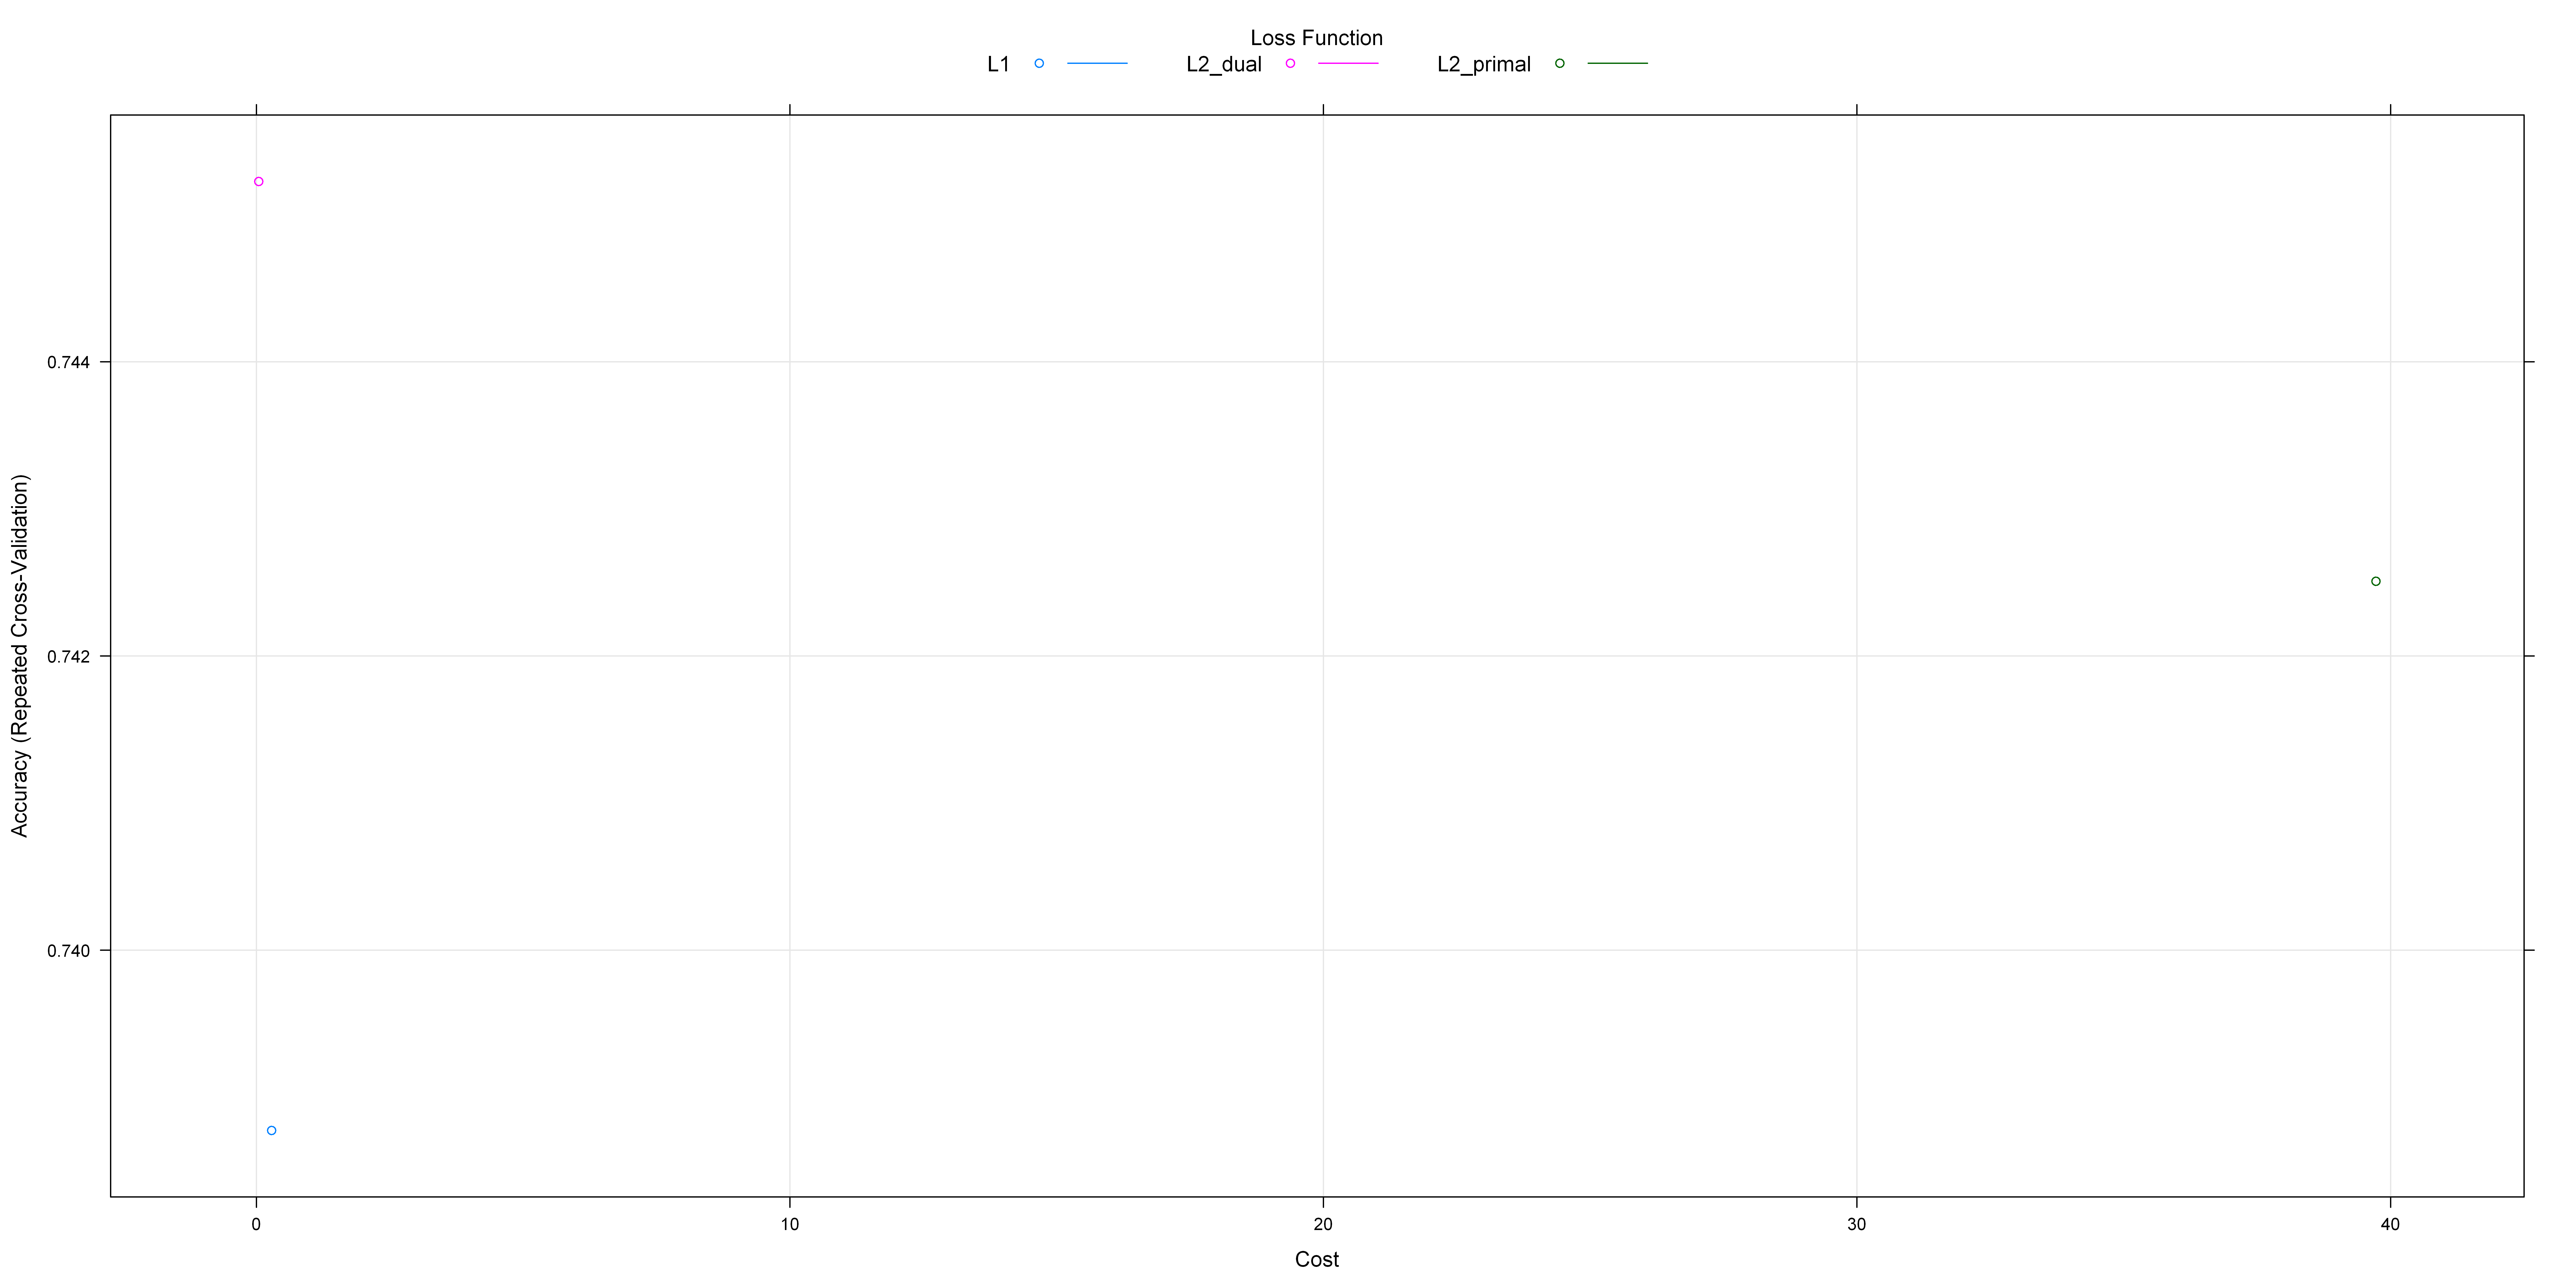

In [108]:
print(model_regLogistic)
plot(model_regLogistic)

Boosted Logistic Regression 

1110 samples
  24 predictor
   2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 998, 998, 999, 999, 999, 998, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  22     0.7947045  0.5877857
  52     0.7913479  0.5796140
  70     0.7813128  0.5613516

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 22.


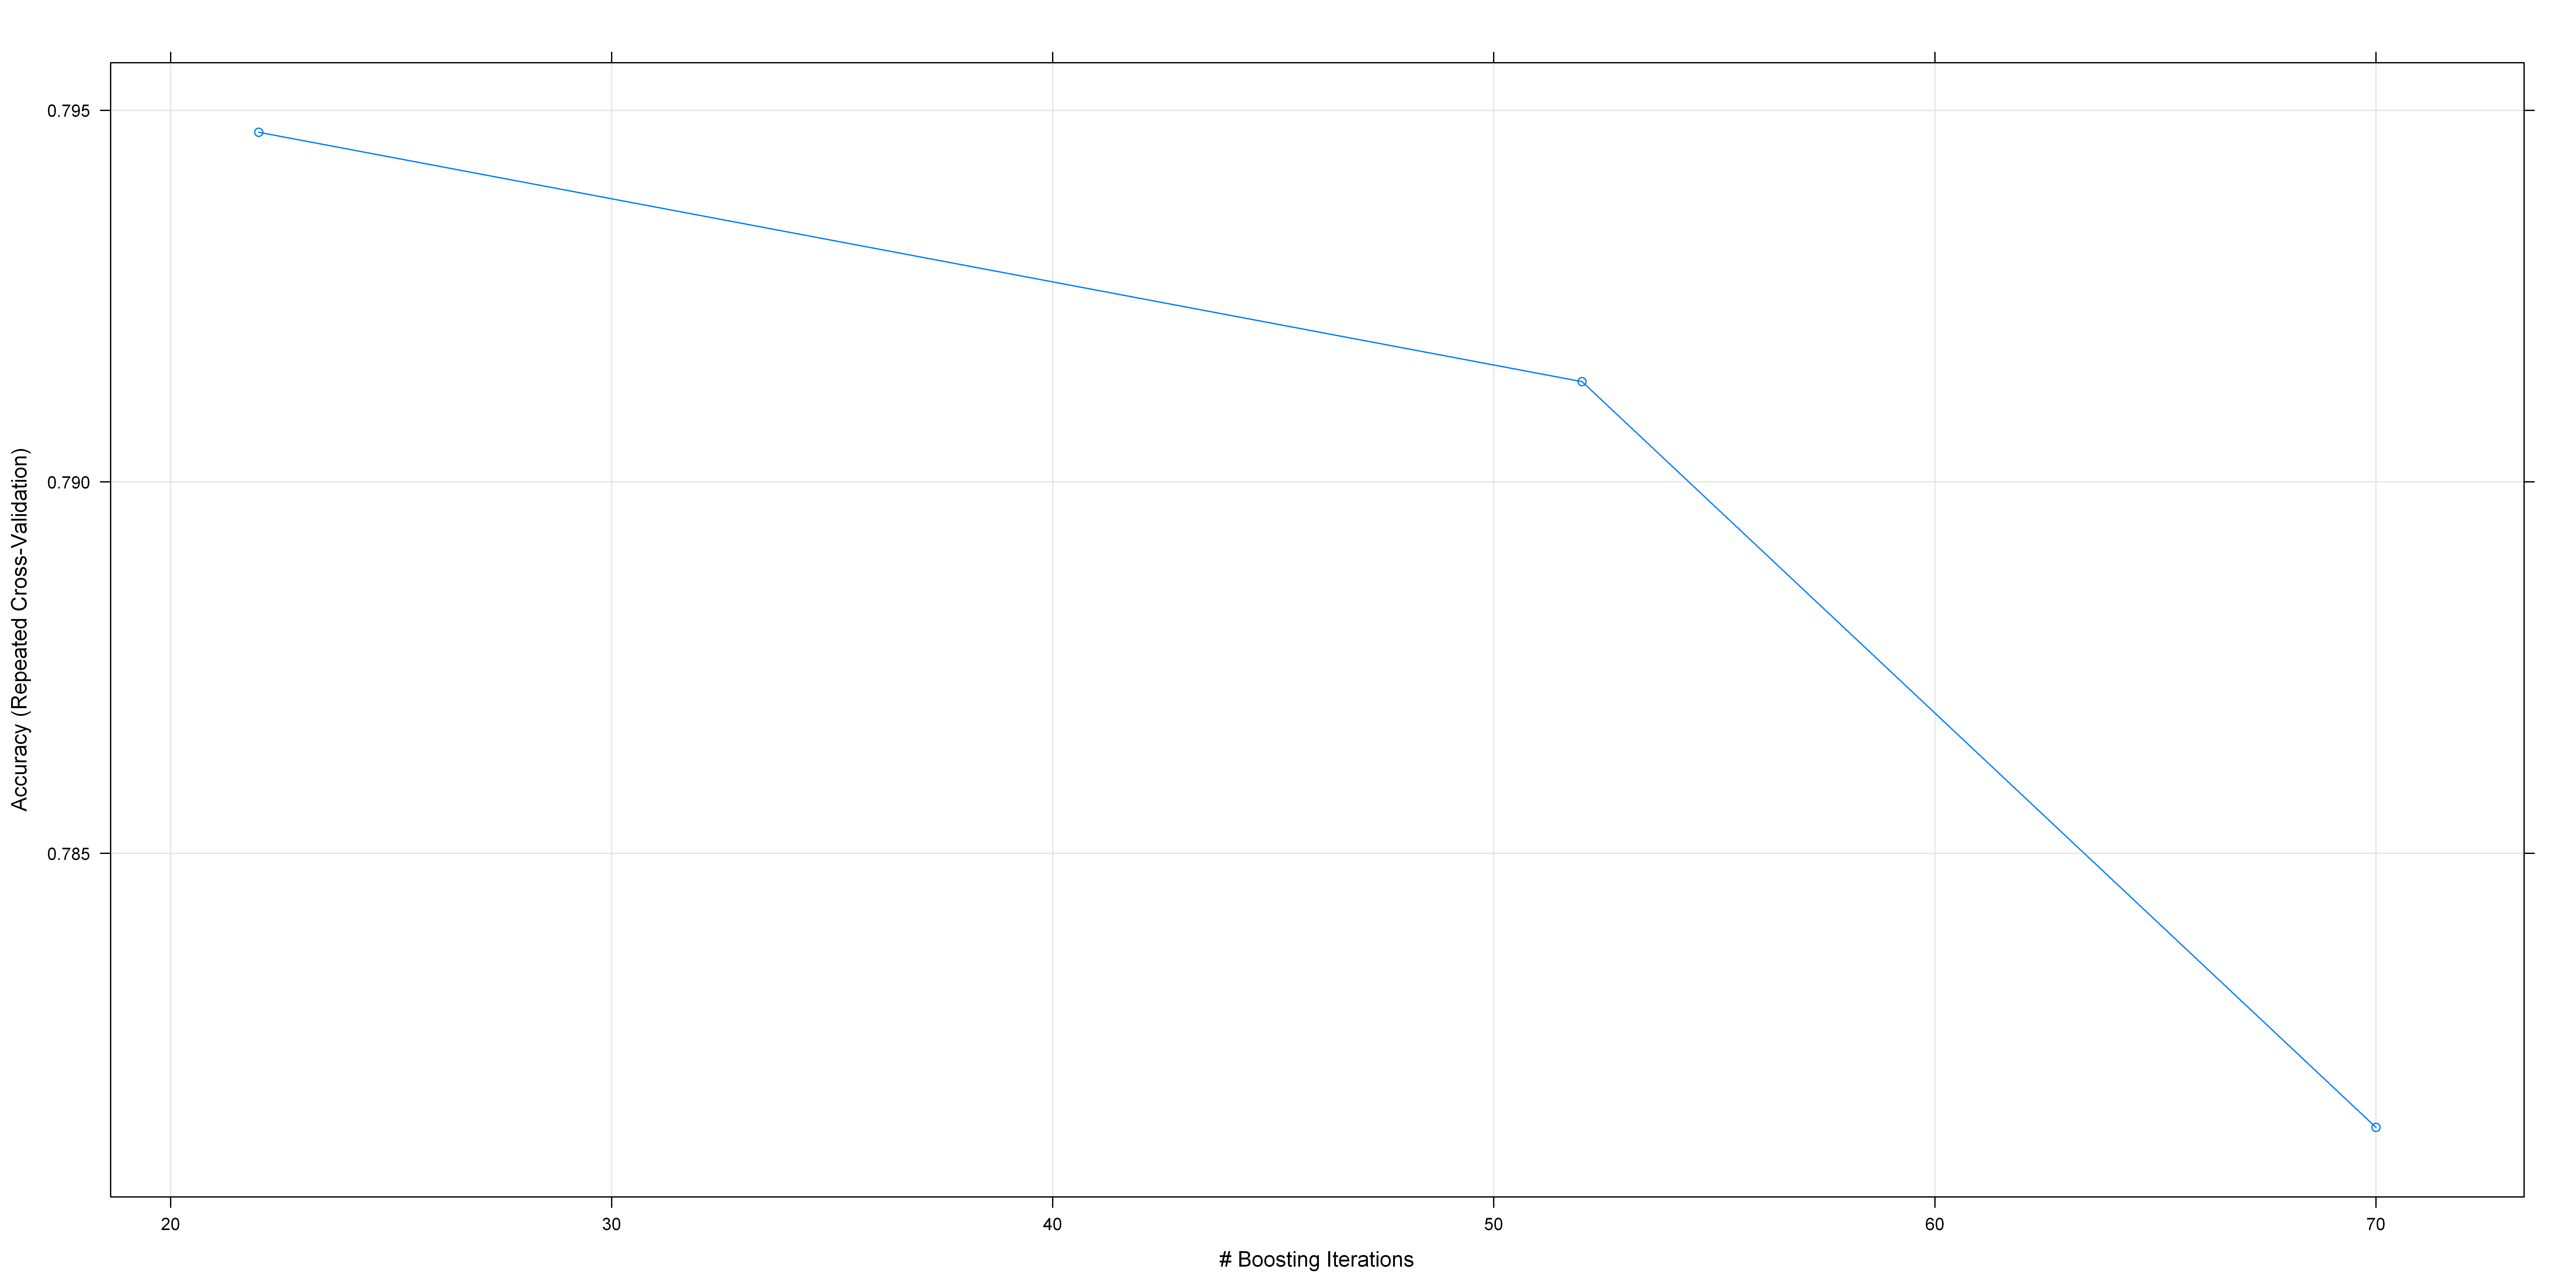

In [109]:
print(model_logitBoost)
plot(model_logitBoost)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.7142857 0.7739899 0.7958333 0.7947045 0.8238782 0.8857143    0
regLogistic 0.6696429 0.7091980 0.7500000 0.7452262 0.7719902 0.8468468    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.4242012 0.5499607 0.5874089 0.5877857 0.6485710 0.7647059    0
regLogistic 0.3392857 0.4185885 0.5000000 0.4905782 0.5440078 0.6936191    0


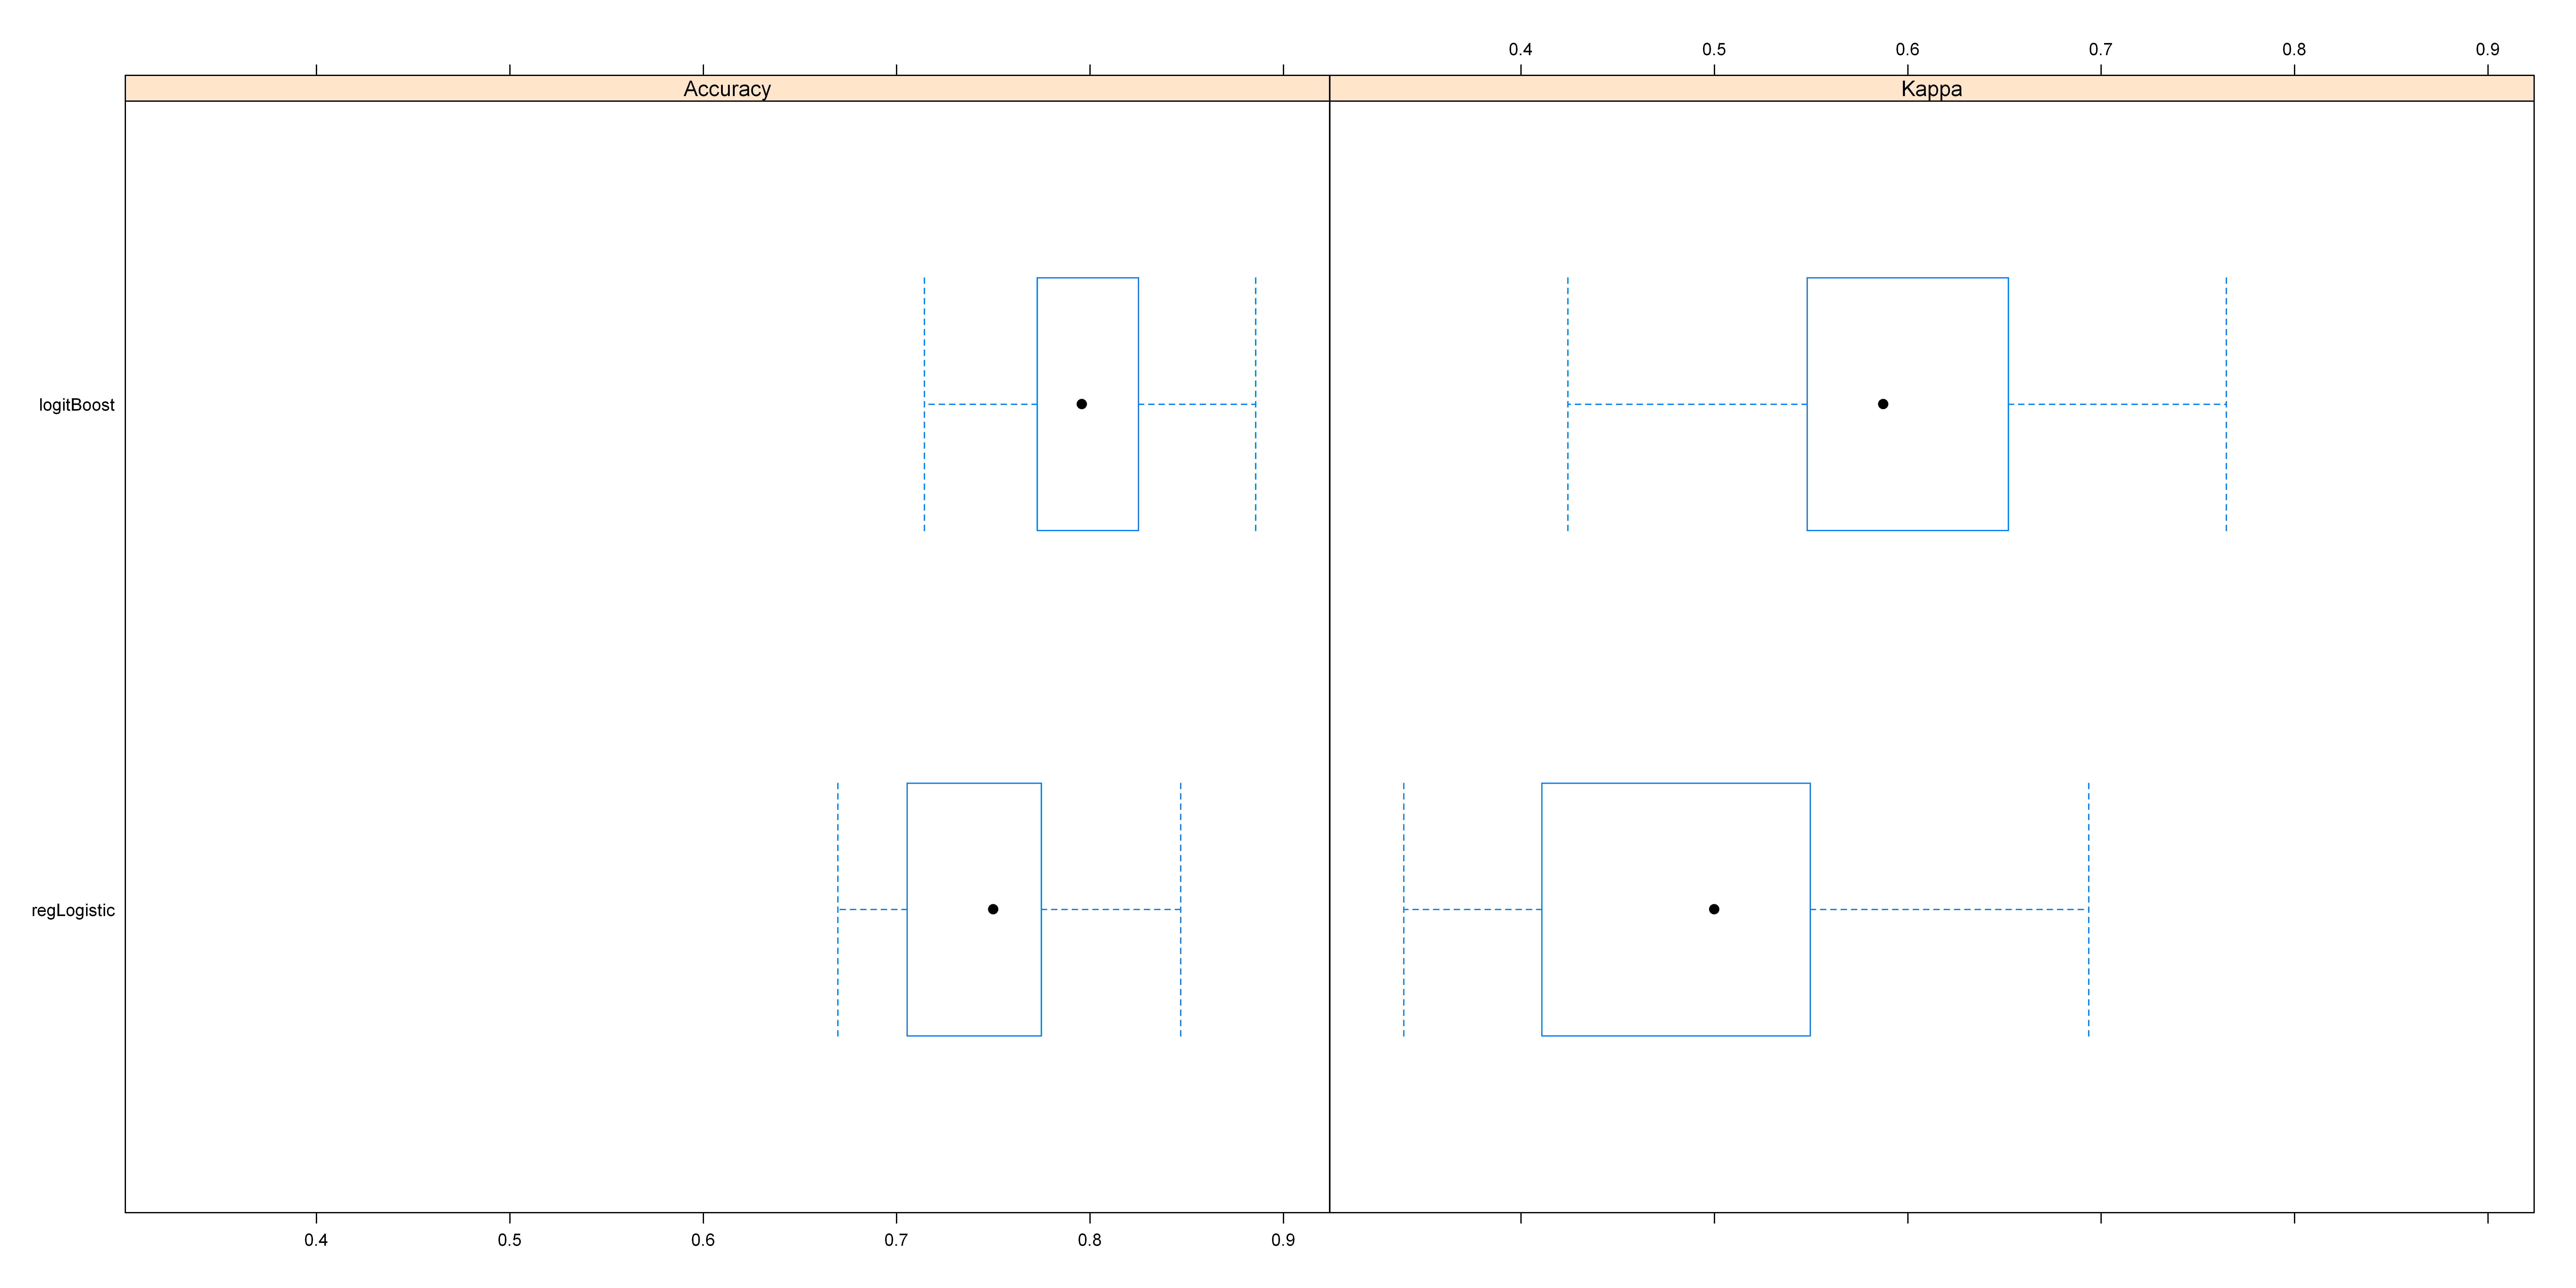

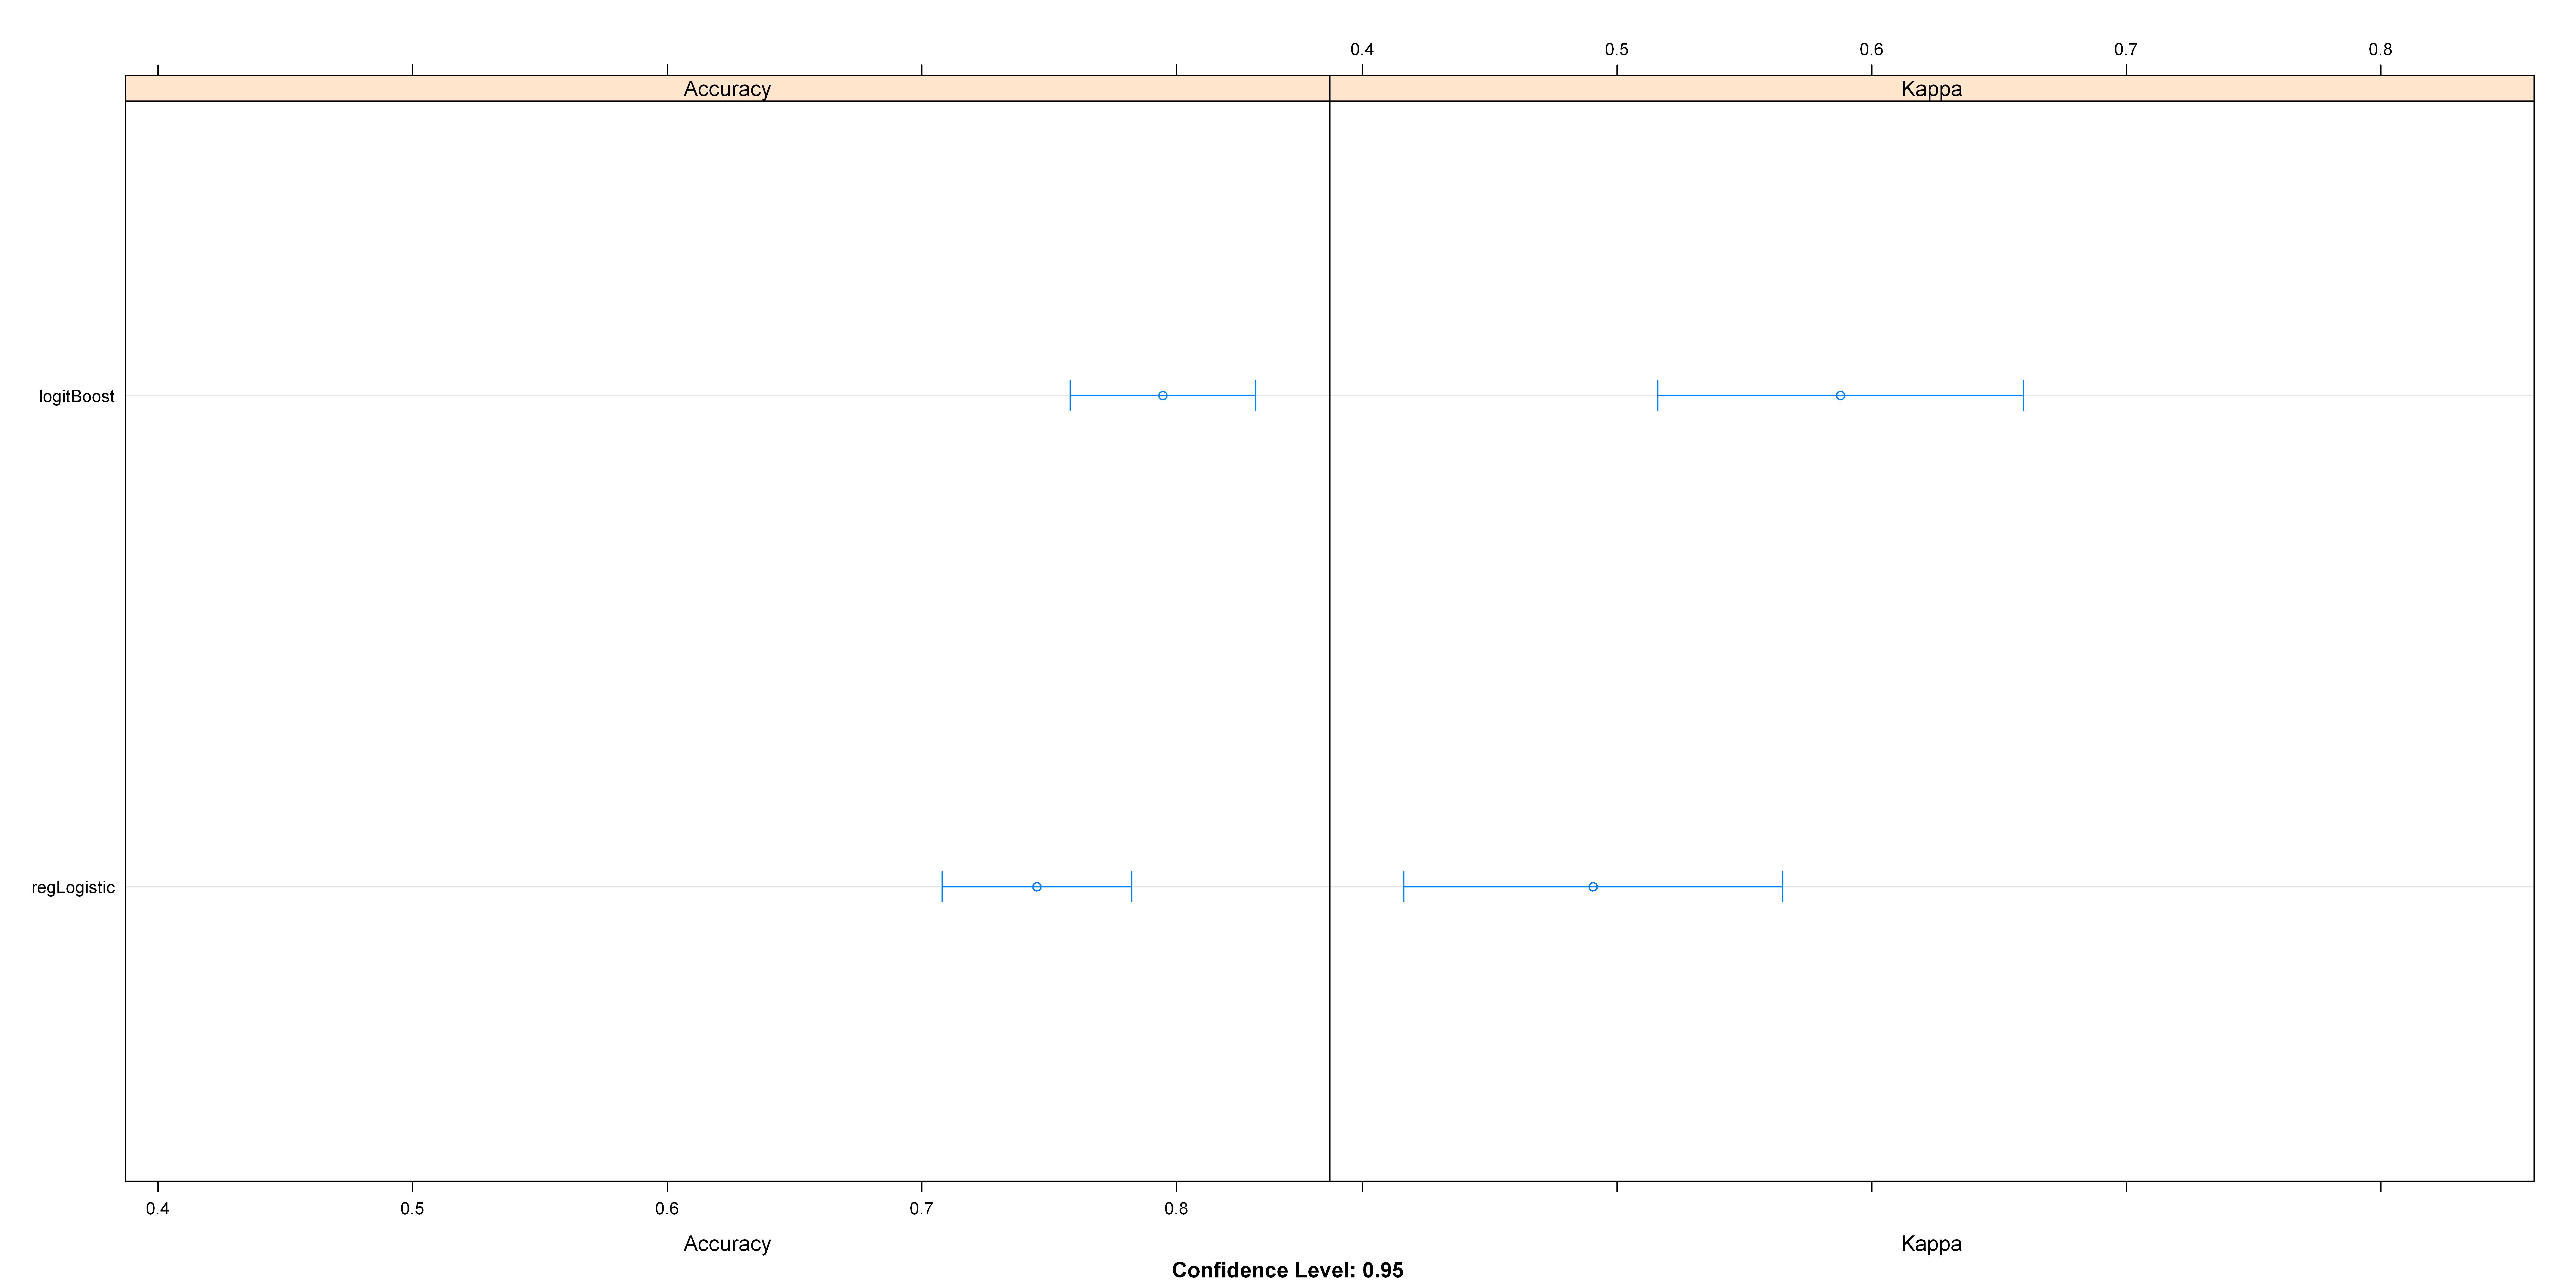

In [110]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

In [111]:
pred_logitBoost <- predict(model_logitBoost,test)   
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      80      34
   NotFast   41     189
                                          
               Accuracy : 0.782           
                 95% CI : (0.7346, 0.8245)
    No Information Rate : 0.6483          
    P-Value [Acc > NIR] : 4.901e-08       
                                          
                  Kappa : 0.5155          
                                          
 Mcnemar's Test P-Value : 0.4884          
                                          
            Sensitivity : 0.6612          
            Specificity : 0.8475          
         Pos Pred Value : 0.7018          
         Neg Pred Value : 0.8217          
             Prevalence : 0.3517          
         Detection Rate : 0.2326          
   Detection Prevalence : 0.3314          
      Balanced Accuracy : 0.7543          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6611570            0.8475336            0.7017544 
      Neg Pred Value            Precision               Recall 
           0.8217391            0.7017544            0.6611570 
                  F1           Prevalence       Detection Rate 
           0.6808511            0.3517442            0.2325581 
Detection Prevalence    Balanced Accuracy 
           0.3313953            0.7543453

In [112]:
table(test$deg_cat)


   fast NotFast 
    171     305 

In [113]:
pred_regLogistic <- predict(model_regLogistic,test)   
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast     132      39
   NotFast   83     222
                                         
               Accuracy : 0.7437         
                 95% CI : (0.702, 0.7824)
    No Information Rate : 0.5483         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.4731         
                                         
 Mcnemar's Test P-Value : 9.9e-05        
                                         
            Sensitivity : 0.6140         
            Specificity : 0.8506         
         Pos Pred Value : 0.7719         
         Neg Pred Value : 0.7279         
             Prevalence : 0.4517         
         Detection Rate : 0.2773         
   Detection Prevalence : 0.3592         
      Balanced Accuracy : 0.7323         
                                         
       'Positive' Class : fast           
                                   

Sensitivity          Specificity       Pos Pred Value 
           0.6139535            0.8505747            0.7719298 
      Neg Pred Value            Precision               Recall 
           0.7278689            0.7719298            0.6139535 
                  F1           Prevalence       Detection Rate 
           0.6839378            0.4516807            0.2773109 
Detection Prevalence    Balanced Accuracy 
           0.3592437            0.7322641

In [114]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                   100.00
centreCode                    76.03
IntraoperativTransfected      75.35
surgeryDuration               63.50
albumina                      63.07
presentRefractAscites         56.34
ratioPaO2FiO2                 53.17
plasmaPools                   52.46
platCountTranspl              45.51
intermedLactates              43.83
noradrenalineEndSurger        43.34
degenzaPreTra                 41.74
new_admWard                   41.00
albumInfusOver7Days           37.58
EPScum                        32.47
syndromeReperfus              29.78
CRIOprecipitated              29.63
organDonorDrawalSodiemia      15.95
plasmaFresco                  13.88
Albumina50Comp                11.71

In [115]:
varImp(model_logitBoost)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                   100.00
centreCode                    76.03
IntraoperativTransfected      75.35
surgeryDuration               63.50
albumina                      63.07
presentRefractAscites         56.34
ratioPaO2FiO2                 53.17
plasmaPools                   52.46
platCountTranspl              45.51
intermedLactates              43.83
noradrenalineEndSurger        43.34
degenzaPreTra                 41.74
new_admWard                   41.00
albumInfusOver7Days           37.58
EPScum                        32.47
syndromeReperfus              29.78
CRIOprecipitated              29.63
organDonorDrawalSodiemia      15.95
plasmaFresco                  13.88
Albumina50Comp                11.71

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



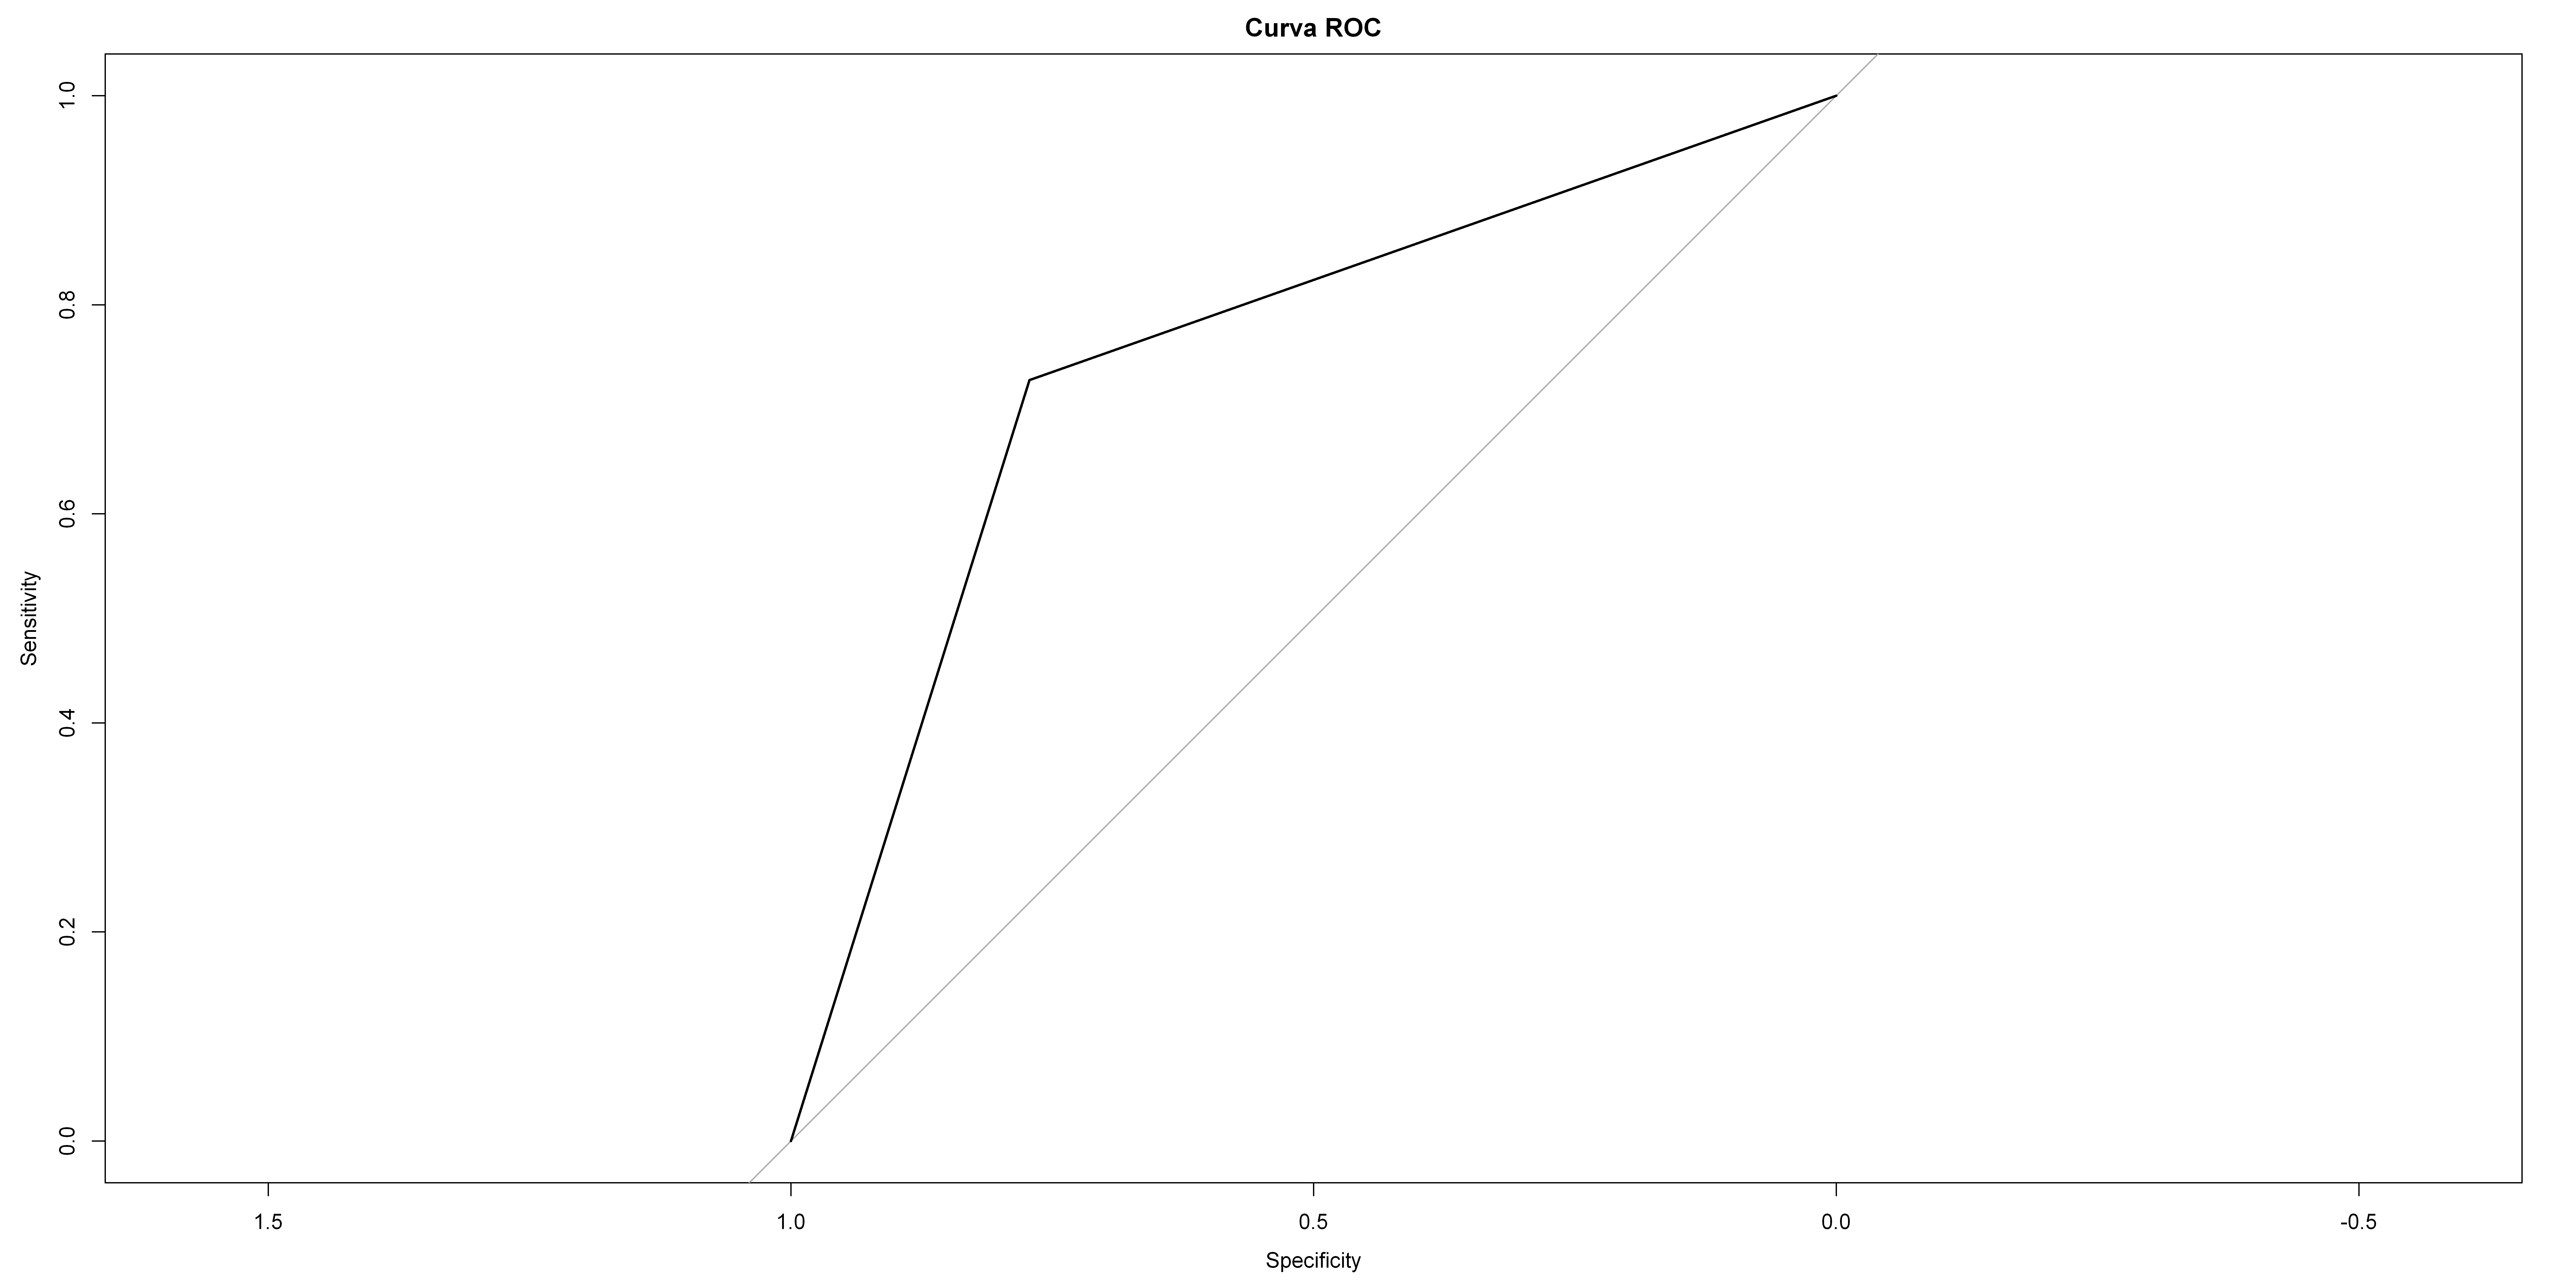

In [116]:
roc_obj <- roc(TestClasses, as.numeric(pred_regLogistic))
plot(roc_obj, main="Curva ROC")

In [117]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_regLogistic))

Data: as.numeric(pred_regLogistic) in 171 controls (TestClasses fast) < 305 cases (TestClasses NotFast).
Area under the curve: 0.7499

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



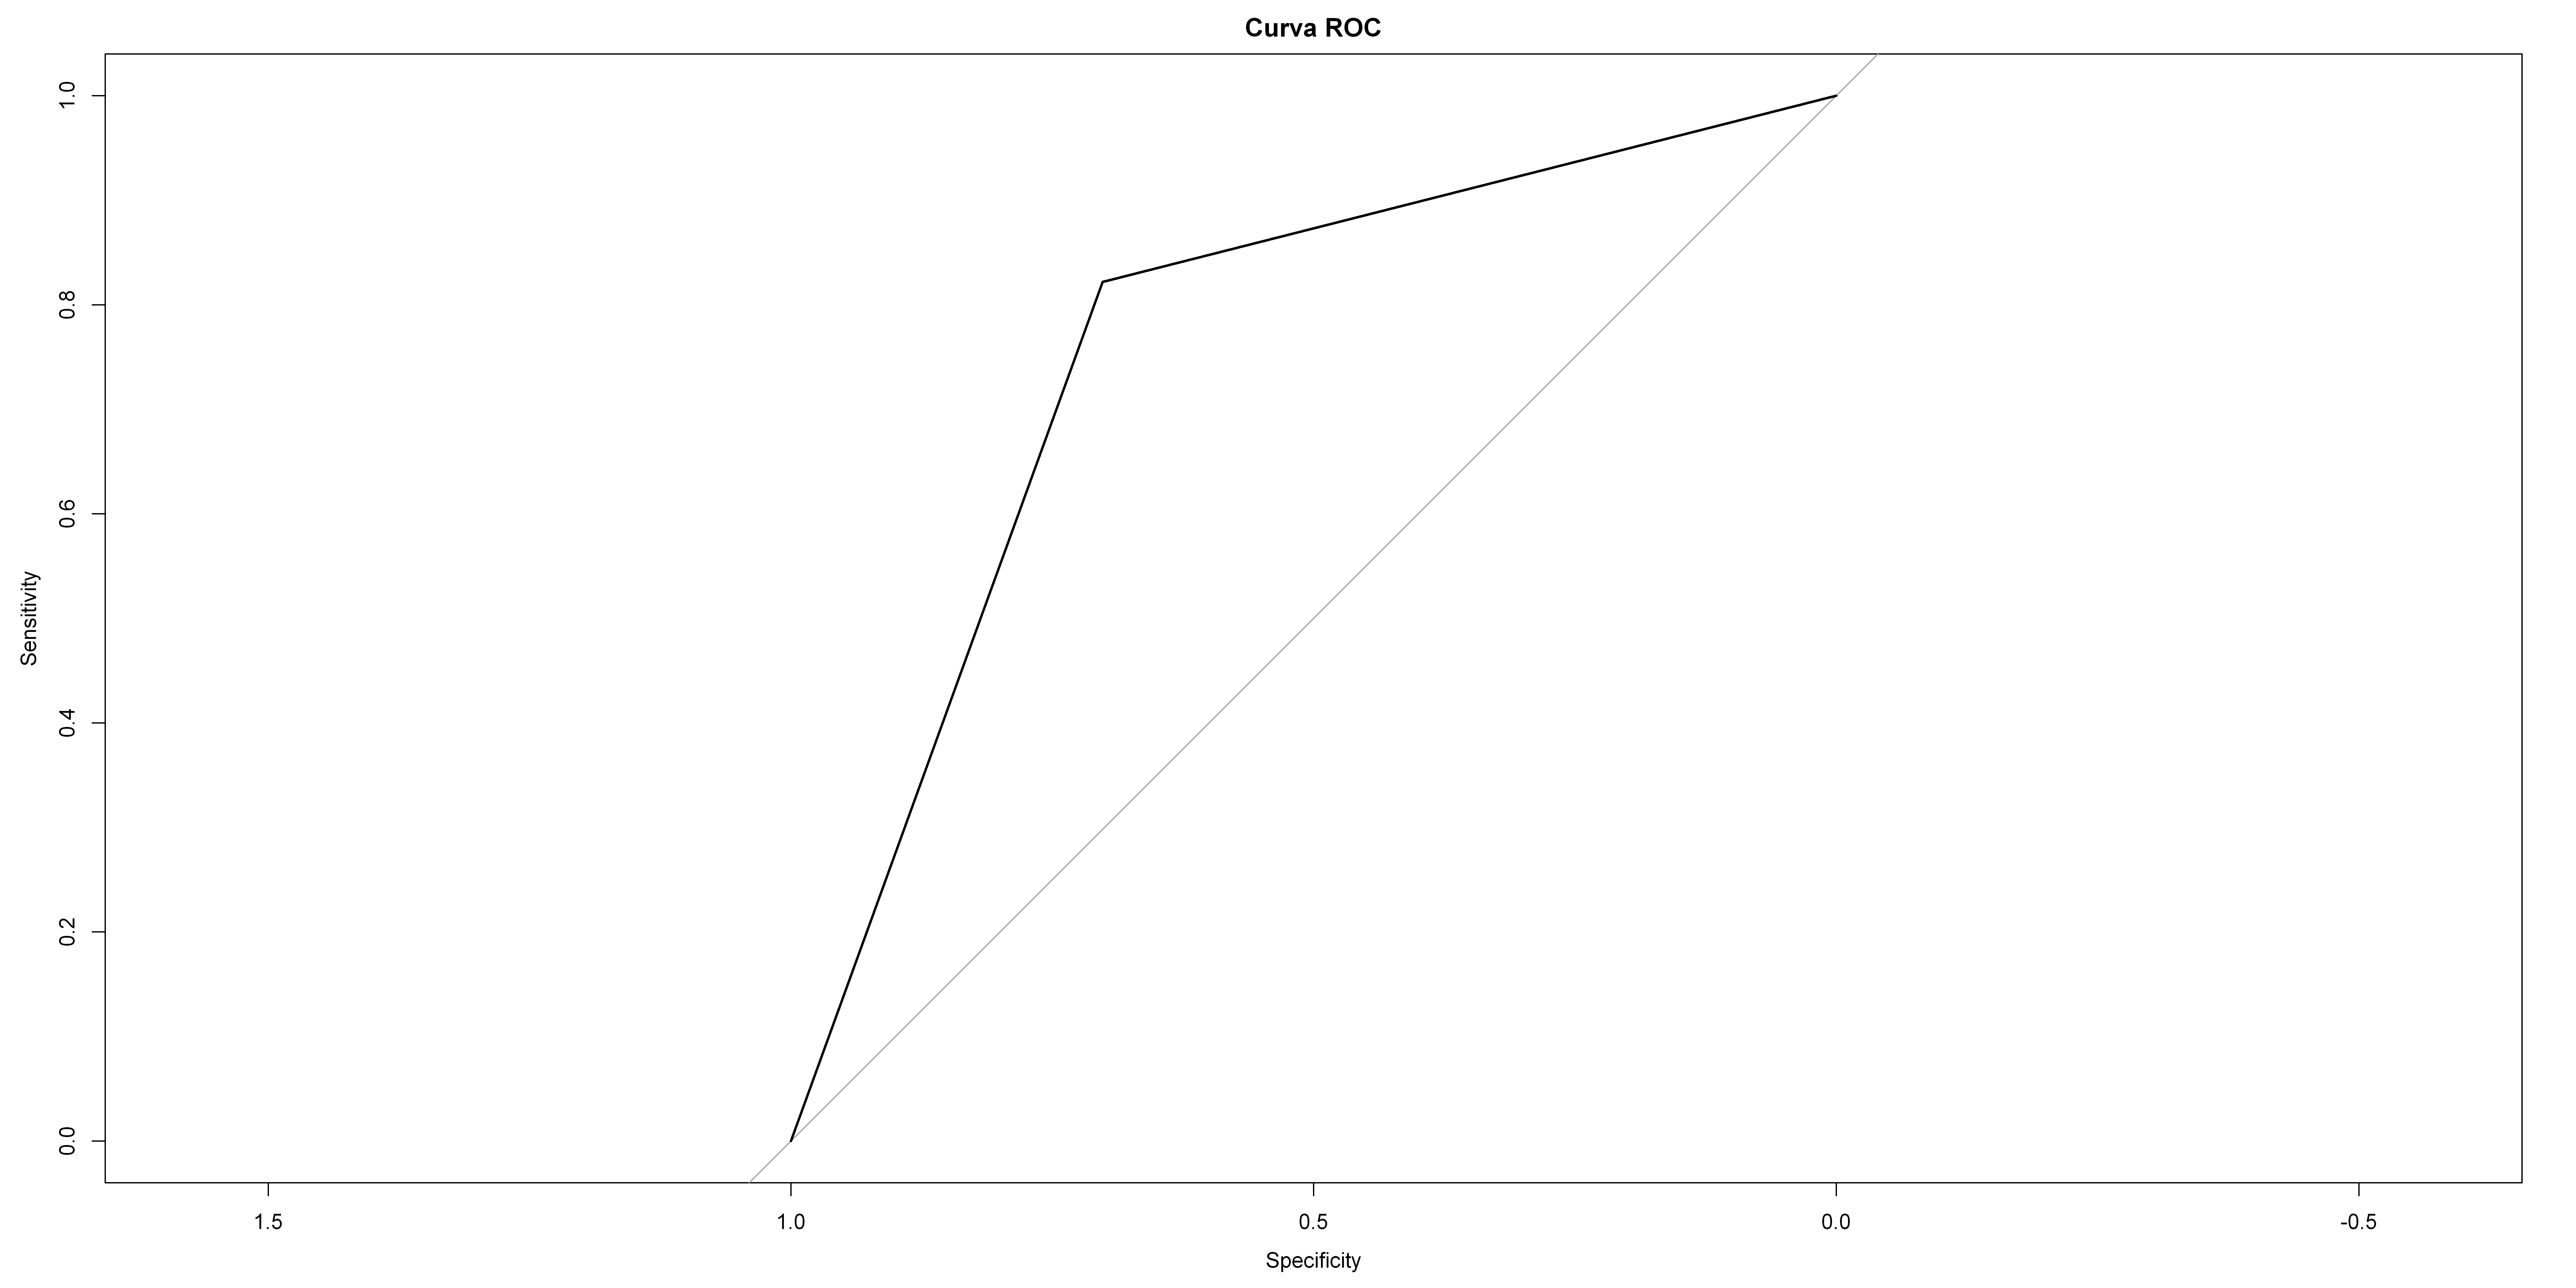

In [118]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [119]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 114 controls (TestClasses fast) < 230 cases (TestClasses NotFast).
Area under the curve: 0.7617